Carga de la data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine

In [6]:
# Conectar a la base de datos

conexion = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "root1234",
    database = "telecom_argentina"
)

In [7]:
# Crear un motor de conexión con SQLAlchemy
usuario = 'root'
contraseña = 'root1234'
host = 'localhost'
base_de_datos = 'telecom_argentina'

cadena_conexion = f'mysql+mysqlconnector://{usuario}:{contraseña}@{host}/{base_de_datos}'
engine = create_engine(cadena_conexion)

In [8]:
cursor = conexion.cursor()

In [9]:
# Ejecutar una consulta para obtener todos los nombres de las tablas
cursor.execute("SHOW TABLES")

In [10]:
# Guardar los nombres de las tablas en una lista
tablas = cursor.fetchall()

In [11]:
tablas

[('acc_vel_loc_sinrangos',),
 ('accesos_por_tecnología',),
 ('accesos_por_velocidad',),
 ('accesos_tecnologia_localidad',),
 ('dial_baf',),
 ('ingresos',),
 ('penetracion_hogares',),
 ('penetracion_totales',),
 ('penetración_poblacion',),
 ('totales_accesos_por_tecnología',),
 ('totales_accesos_por_velocidad',),
 ('totales_dial_baf',),
 ('totales_vmd',),
 ('velocidad_por_prov',),
 ('velocidad_sin_rangos',)]

In [12]:
# Diccionario para almacenar los DataFrames
dataframes = {}

# Iterar sobre las tablas y cargarlas en DataFrames
for (tabla,) in tablas:
    # Cargar la tabla en un DataFrame
    df = pd.read_sql_table(tabla, con=engine)
    # Guardar el DataFrame en el diccionario
    dataframes[tabla] = df

# Cerrar la conexión
conexion.close()

In [13]:
dataframes['acc_vel_loc_sinrangos']

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3062,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3063,TUCUMAN,Yerba Buena,Villa Carmela,90119020,8.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dataframes['acc_vel_loc_sinrangos'].shape

(3065, 125)

Observacionde datos nulos

In [15]:
dataframes['acc_vel_loc_sinrangos'].isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2035
              ... 
999 Mbps      3048
1000 Mbps     2645
1024 Mbps     3063
4000 Mbps     3064
10000 Mbps    3063
Length: 125, dtype: int64

Convertimos los datos nulos a cero

In [16]:
dataframes['acc_vel_loc_sinrangos'] = dataframes['acc_vel_loc_sinrangos'].fillna(0)

In [17]:
dataframes['acc_vel_loc_sinrangos']

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,TUCUMAN,Trancas,Villa de Trancas,90112030,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,TUCUMAN,Yerba Buena,Villa Carmela,90119020,8.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Identificamos filas duplicadas en todo el dataframe

In [18]:
duplicados = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos'].duplicated()]

In [19]:
duplicados

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps


Identificamos los outliers

In [20]:
from scipy import stats

In [21]:
#Calculamos el z-score
#Calcula el z-score para determinar qué puntos de datos se encuentran a más de 3 desviaciones estándar de la media.
data_z_score = stats.zscore(dataframes['acc_vel_loc_sinrangos'].iloc[:, 4:])

In [22]:
# Identificamos outliers
outliers = data_z_score.abs() > 3

In [23]:
# dejamos solo el dataframe en donde las columnas son true
outliers = dataframes['acc_vel_loc_sinrangos'][outliers.any(axis=1)]

In [24]:
outliers.drop(columns=['Localidad','Link Indec'])

,Provincia,Partido,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
11,BUENOS AIRES,9 de Julio,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
18,BUENOS AIRES,Adolfo Alsina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,BUENOS AIRES,Adolfo Alsina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,BUENOS AIRES,Adolfo Gonzales Chaves,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,BUENOS AIRES,Almirante Brown,0.0,1.0,10.0,1.0,34.0,21.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,325.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2991,TIERRA DEL FUEGO,Río Grande,5137.0,0.0,8.0,9.0,198.0,514.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2994,TIERRA DEL FUEGO,Ushuaia,1980.0,0.0,2.0,1.0,111.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3000,TUCUMAN,Capital,174.0,0.0,8.0,10.0,0.0,773.0,0.0,22.0,...,5.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0


In [25]:
# hacemos un diccionario en donde la keyes es el nombre de la provincia y el values es la cantidad de veces que aparece la provincia
provincias = outliers['Provincia'].unique().tolist()
dicc_provincias = {}
for provincia in provincias:
  dicc_provincias[provincia] = int(outliers['Provincia'].value_counts()[provincia])


In [26]:
# Diccionario de outliers por provincia
dicc_provincias

{'BUENOS AIRES': 144,
 'CABA': 1,
 'CATAMARCA': 1,
 'CHACO': 2,
 'CHUBUT': 8,
 'CORDOBA': 49,
 'CORRIENTES': 8,
 'ENTRE RIOS': 15,
 'FORMOSA': 4,
 'JUJUY': 8,
 'LA PAMPA': 8,
 'LA RIOJA': 4,
 'MENDOZA': 11,
 'MISIONES': 20,
 'NEUQUEN': 10,
 'RIO NEGRO': 7,
 'SALTA': 7,
 'SAN JUAN': 3,
 'SAN LUIS': 8,
 'SANTA CRUZ': 3,
 'SANTA FE': 46,
 'SANTIAGO DEL ESTERO': 5,
 'TIERRA DEL FUEGO': 3,
 'TUCUMAN': 2}

Agregamos una nueva columna llamada Suma_Acceso_Internet que es la sumatoria total de acceso a internet por localidad

In [27]:
dataframes['acc_vel_loc_sinrangos']['Suma_Acceso_Internet'] = dataframes['acc_vel_loc_sinrangos'].iloc[:, 4:].sum(axis=1)

C:\Users\rogel\AppData\Local\Temp\ipykernel_2524\2342879497.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframes['acc_vel_loc_sinrangos']['Suma_Acceso_Internet'] = dataframes['acc_vel_loc_sinrangos'].iloc[:, 4:].sum(axis=1)


Agrupamos las provincias y obtenemos la sumatoria de la columna Sumas_Acceso_Internet para visualizar la cantidad total de accesos a internet por provincia

In [28]:
#Provincias
dataframes['acc_vel_loc_sinrangos'].groupby('Provincia')['Suma_Acceso_Internet'].sum().sort_values(ascending=False)

Provincia
BUENOS AIRES           5044557.0
CABA                   1504711.0
CORDOBA                1082199.0
SANTA FE                918588.0
MENDOZA                 302597.0
ENTRE RIOS              296552.0
TUCUMAN                 264595.0
SALTA                   202861.0
MISIONES                202556.0
RIO NEGRO               171019.0
CHUBUT                  170676.0
NEUQUEN                 164246.0
CORRIENTES              157894.0
SAN LUIS                156090.0
CHACO                   155543.0
SANTIAGO DEL ESTERO     124362.0
LA PAMPA                122195.0
JUJUY                   118053.0
SAN JUAN                106666.0
LA RIOJA                 87782.0
SANTA CRUZ               80208.0
CATAMARCA                74933.0
FORMOSA                  62718.0
TIERRA DEL FUEGO         61555.0
Name: Suma_Acceso_Internet, dtype: float64

Realizamos una grafica de barras de  la suma de accesos por provicncia

In [29]:
suma_accesos = dataframes['acc_vel_loc_sinrangos'].groupby('Provincia')['Suma_Acceso_Internet'].sum()
suma_accesos = pd.DataFrame(suma_accesos)

In [30]:
suma_accesos.reset_index(inplace=True)

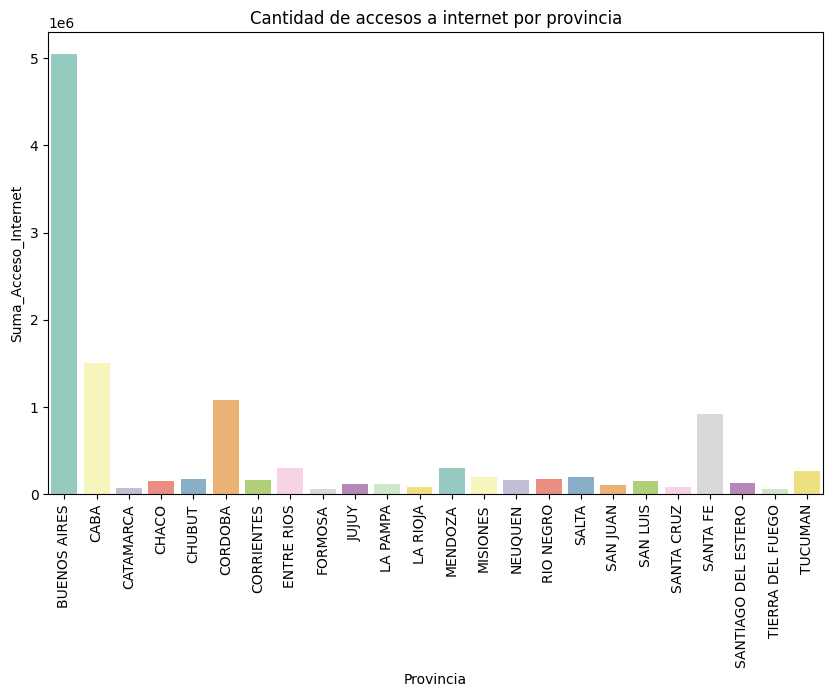

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Provincia', y='Suma_Acceso_Internet', data= suma_accesos ,palette = 'Set3',hue = 'Provincia')
plt.title('Cantidad de accesos a internet por provincia')
plt.xticks(rotation=90)
plt.show()


## Ahora obtenemos la informacion de el numero de accesos a internet por velocidad

In [32]:
velocidades = dataframes['acc_vel_loc_sinrangos'].columns[4:len(dataframes['acc_vel_loc_sinrangos'].columns)-1].tolist()

In [33]:
dicc_vel = {}
for velocidad in velocidades:
  dicc_vel[velocidad] = dataframes['acc_vel_loc_sinrangos'][velocidad].sum()

In [34]:
data_v = pd.DataFrame.from_dict(dicc_vel,orient='index',columns=['Total Access'])

In [35]:
data_v = data_v.sort_values(by='Total Access',ascending=False).iloc[:15]

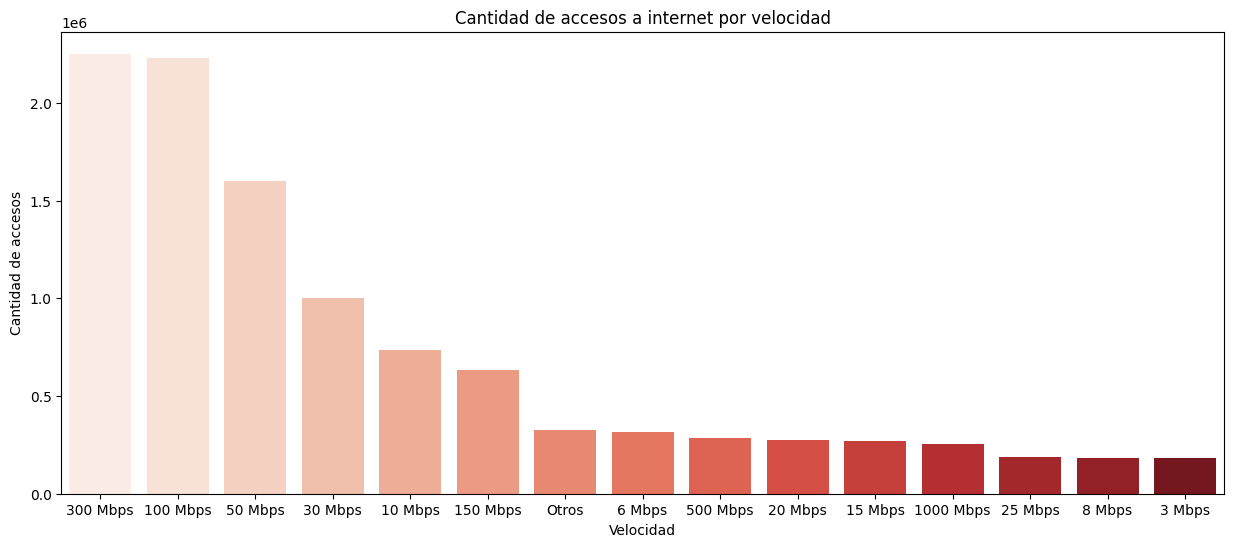

In [36]:
#Grafica de barras del dataframe data_v
plt.figure(figsize=(15,6))
sns.barplot(x=data_v.index,y=data_v['Total Access'],palette='Reds' ,hue = data_v.index, legend=False)
plt.title('Cantidad de accesos a internet por velocidad')
plt.xlabel('Velocidad')
plt.ylabel('Cantidad de accesos')
plt.show()

## Graficas que muestran las 6 provincias con mayor y menor acceso de las 5 velocidades de descarga mas utilizadas

In [37]:
def vel_provincia(df,provincia):
  """Funcion que recibe por parametro el Dataframe data_frames['Acc_vel_loc_sinrangos'] y el nombre de una provincia y devuelve como resultado un data frame agrupado por provincia
  las 5 velocidades en donde hay la mayor cantidad de accesos"""
  df = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos']['Provincia'] == provincia]
  velocidades = df.columns[4:len(df.columns)-1].tolist()
  dicc_vel = {}
  for velocidad in velocidades:
    dicc_vel[velocidad] = df[velocidad].sum()
  df_vel = pd.DataFrame.from_dict(dicc_vel,orient='index',columns=['Total Access'])
  df_vel = df_vel.sort_values(by='Total Access',ascending=False).iloc[:5]
  return df_vel


Provincias con mayor acceso

In [38]:
data_Buenos_Aires_v=vel_provincia(dataframes['acc_vel_loc_sinrangos'],'BUENOS AIRES')
data_CABA_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'CABA')
data_CORDOBA_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'CORDOBA')
data_SANTA_FE_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'SANTA FE')
data_MENDOZA_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'MENDOZA')
data_ENTRE_RIOS_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'ENTRE RIOS')

Text(0, 0.5, 'Numero de Accesos')

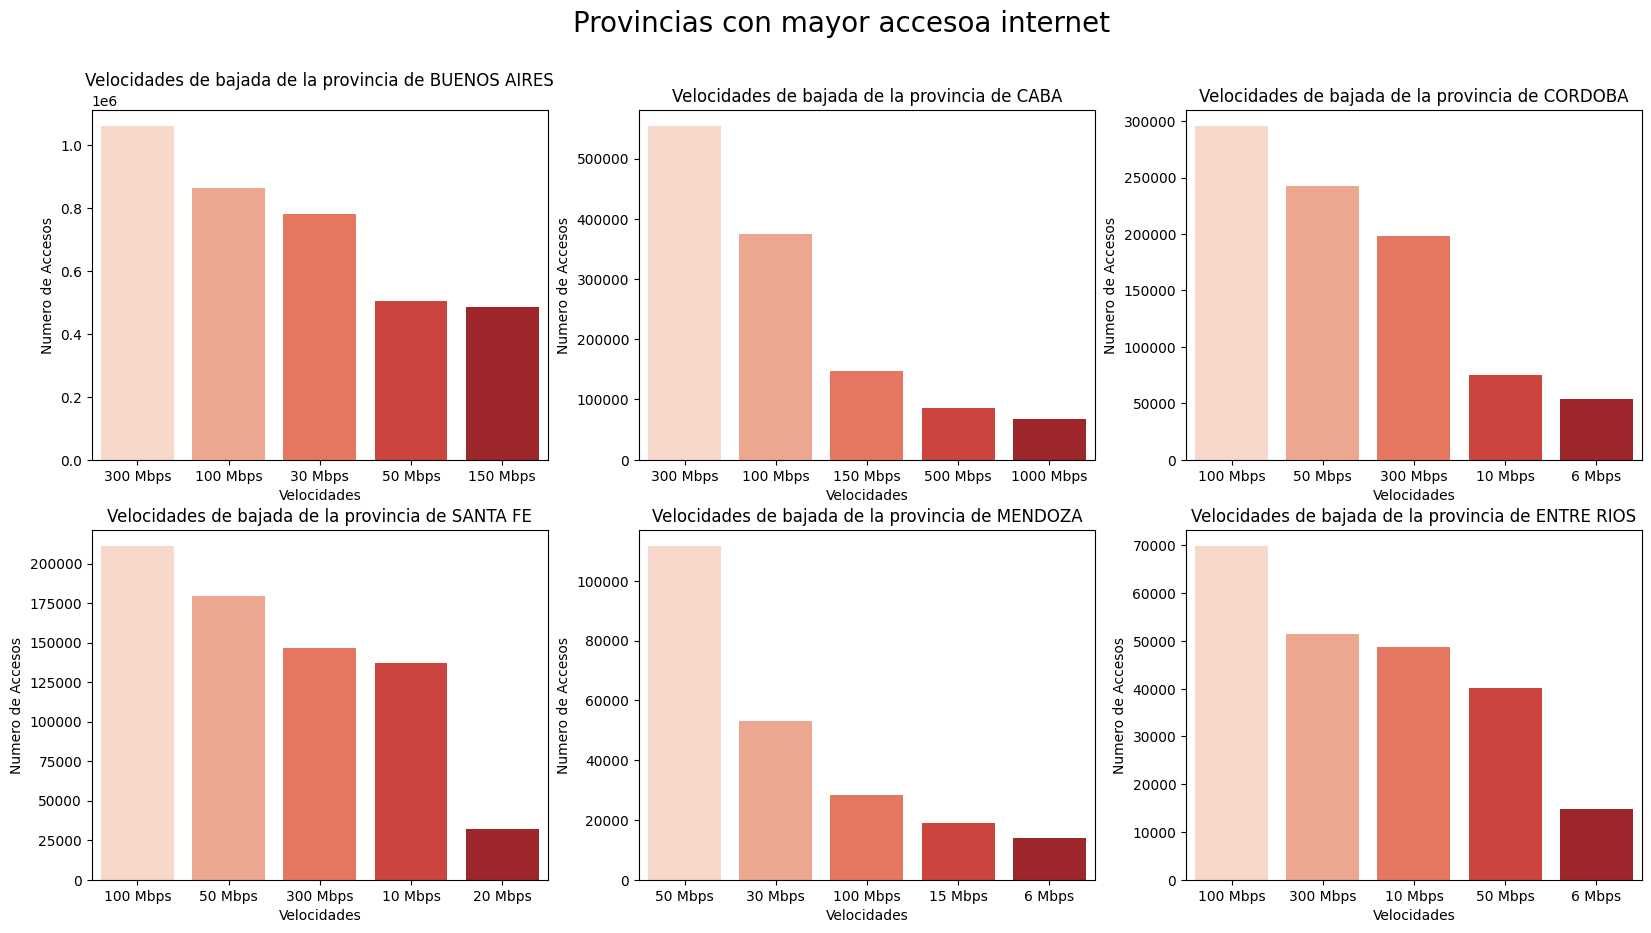

In [39]:
# Graficas por provinciascon las velocidades de mayoracceso
#hacemos un subplot para visulaizar las graficas de barras data_top_10 y data_Untop_10
plt.figure(figsize = (20 ,10))

plt.suptitle('Provincias con mayor accesoa internet', fontsize=20)


plt.subplot(2,3,1)
plt.title("Velocidades de bajada de la provincia de BUENOS AIRES")
sns.barplot(x=data_Buenos_Aires_v.index, y='Total Access', data=data_Buenos_Aires_v, palette = 'Reds',hue = data_Buenos_Aires_v.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,2)
plt.title("Velocidades de bajada de la provincia de CABA")
sns.barplot(x=data_CABA_vel.index, y='Total Access', data=data_CABA_vel, palette = 'Reds',hue = data_CABA_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,3)
plt.title("Velocidades de bajada de la provincia de CORDOBA")
sns.barplot(x=data_CORDOBA_vel.index, y='Total Access', data=data_CORDOBA_vel, palette = 'Reds',hue = data_CORDOBA_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,4)
plt.title("Velocidades de bajada de la provincia de SANTA FE")
sns.barplot(x=data_SANTA_FE_vel.index, y='Total Access', data=data_SANTA_FE_vel,palette = 'Reds',hue = data_SANTA_FE_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,5)
plt.title("Velocidades de bajada de la provincia de MENDOZA")
sns.barplot(x=data_MENDOZA_vel.index, y='Total Access', data=data_MENDOZA_vel,palette = 'Reds',hue = data_MENDOZA_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,6)
plt.title("Velocidades de bajada de la provincia de ENTRE RIOS")
sns.barplot(x=data_ENTRE_RIOS_vel.index, y='Total Access', data=data_ENTRE_RIOS_vel,palette = 'Reds',hue = data_ENTRE_RIOS_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

In [40]:
data_TF_v=vel_provincia(dataframes['acc_vel_loc_sinrangos'],'TIERRA DEL FUEGO')
data_FOR_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'FORMOSA')
data_CAT_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'CATAMARCA')
data_SC_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'SANTA CRUZ')
data_RIOJA_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'LA RIOJA')
data_SJ_vel = vel_provincia(dataframes['acc_vel_loc_sinrangos'],'SAN JUAN')

Text(0, 0.5, 'Numero de Accesos')

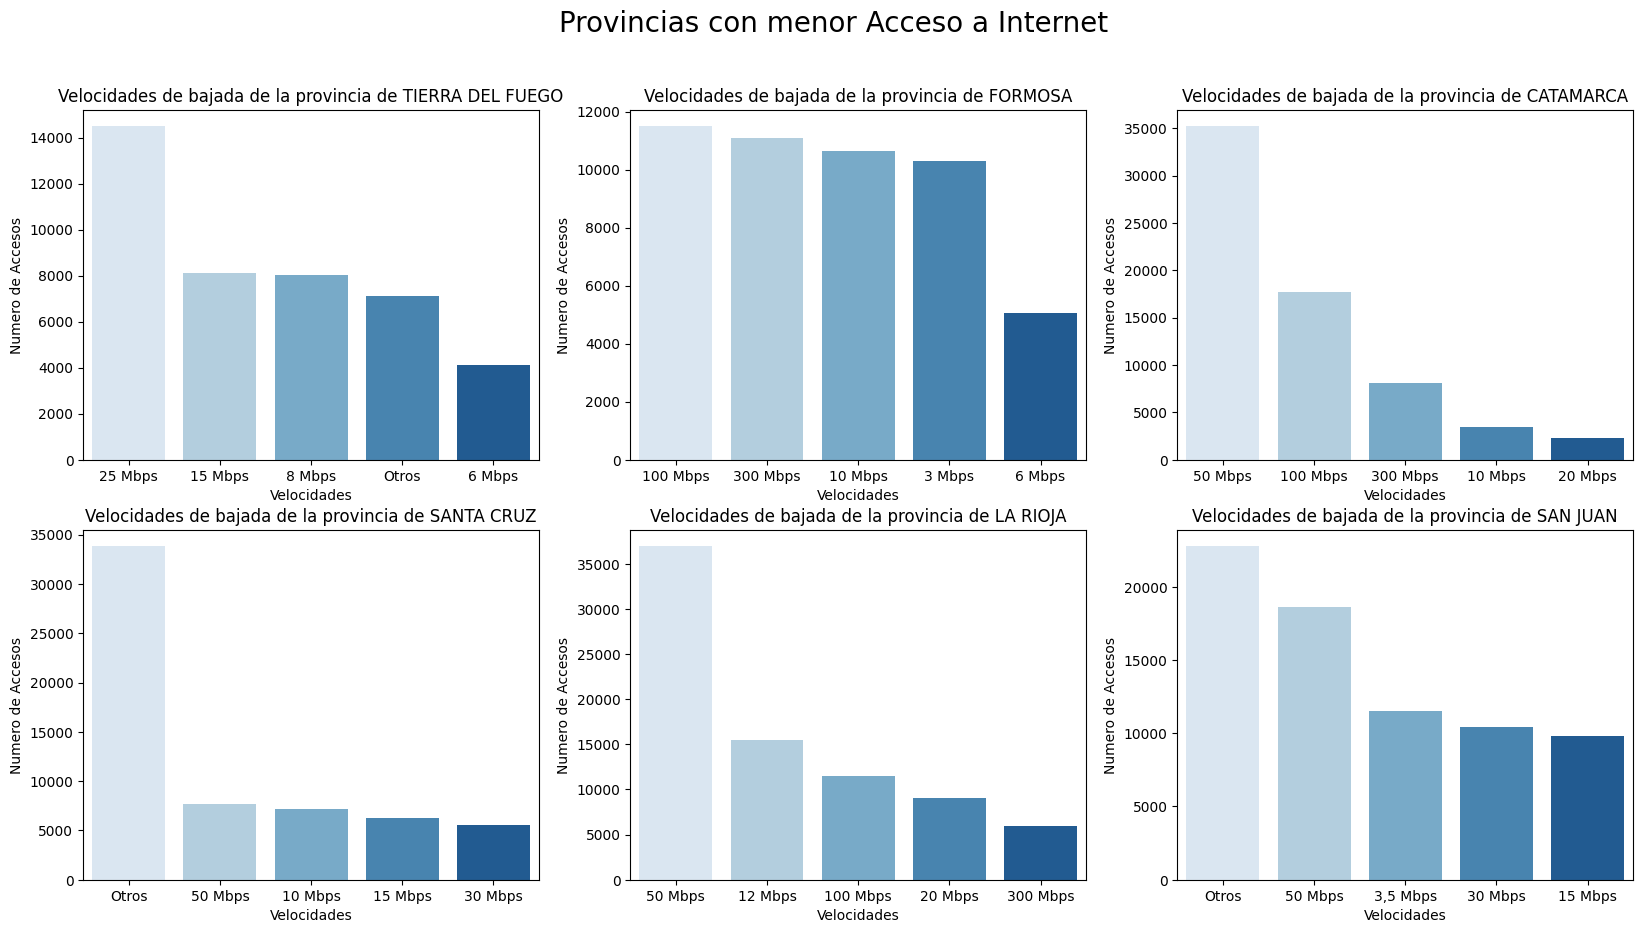

In [41]:
# Graficas por provinciascon las velocidades de mayoracceso
#hacemos un subplot para visulaizar las graficas de barras data_top_10 y data_Untop_10
plt.figure(figsize = (20 ,10))


plt.suptitle('Provincias con menor Acceso a Internet', fontsize=20)

plt.subplot(2,3,1)
plt.title("Velocidades de bajada de la provincia de TIERRA DEL FUEGO")
sns.barplot(x=data_TF_v.index, y='Total Access', data=data_TF_v, palette = 'Blues',hue = data_TF_v.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,2)
plt.title("Velocidades de bajada de la provincia de FORMOSA")
sns.barplot(x=data_FOR_vel.index, y='Total Access', data=data_FOR_vel, palette = 'Blues',hue = data_FOR_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,3)
plt.title("Velocidades de bajada de la provincia de CATAMARCA")
sns.barplot(x=data_CAT_vel.index, y='Total Access', data=data_CAT_vel, palette = 'Blues',hue = data_CAT_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,4)
plt.title("Velocidades de bajada de la provincia de SANTA CRUZ")
sns.barplot(x=data_SC_vel.index, y='Total Access', data=data_SC_vel,palette = 'Blues',hue = data_SC_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,5)
plt.title("Velocidades de bajada de la provincia de LA RIOJA")
sns.barplot(x=data_RIOJA_vel.index, y='Total Access', data=data_RIOJA_vel,palette = 'Blues',hue = data_RIOJA_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

plt.subplot(2,3,6)
plt.title("Velocidades de bajada de la provincia de SAN JUAN")
sns.barplot(x=data_SJ_vel.index, y='Total Access', data=data_SJ_vel,palette = 'Blues',hue = data_SJ_vel.index)
plt.xlabel('Velocidades')
plt.ylabel('Numero de Accesos')

## Conclusion velocidades por region
- De las graficas anteriores se puede concluir lo siguiente: La regiones con mayor acceso a internet son las que de igual manera tienen acceso a mayores velocidades resaltando las velocidades en la provincia de CABA(Capital de Buenos Aires) en donde se registra u alto uso de 1000 Mbps lo cual concuerda perfectamente ya que se trata de la ciudad prinicpal de Argentina .Por otro las las provincias con menor acceso a internet muestran un uso de velocidades mas bajas aunque cabe resaltar que en FORMOSA el uso de altas velocidades es alto.

## Graficamos la cantidad de accesos por partido  de las 6 provincias con mayor acceso a internet :

- BUENOS AIRES
- CABA
- CORDOBA
- SANTA FE
- MENDOZA
- ENTRE RIOS

In [42]:
data_Buenos_Aires = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos']['Provincia'] == 'BUENOS AIRES']
data_Buenos_Aires = data_Buenos_Aires.groupby('Partido')['Suma_Acceso_Internet'].sum().sort_values(ascending=False)[:10].reset_index()

In [43]:
data_CABA = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos']['Provincia'] == 'CABA']
data_CABA = data_CABA.groupby('Partido')['Suma_Acceso_Internet'].sum().sort_values(ascending=False).reset_index()

In [44]:
data_CORDOBA = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos']['Provincia'] == 'CORDOBA']
data_CORDOBA = data_CORDOBA.groupby('Partido')['Suma_Acceso_Internet'].sum().sort_values(ascending=False)[:10].reset_index()

In [45]:
data_SANTA_FE = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos']['Provincia'] == 'SANTA FE']
data_SANTA_FE = data_SANTA_FE.groupby('Partido')['Suma_Acceso_Internet'].sum().sort_values(ascending=False)[:10].reset_index()

In [46]:
data_MENDOZA = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos']['Provincia'] == 'MENDOZA']
data_MENDOZA = data_MENDOZA.groupby('Partido')['Suma_Acceso_Internet'].sum().sort_values(ascending=False)[:10].reset_index()

In [47]:
data_RIOS = dataframes['acc_vel_loc_sinrangos'][dataframes['acc_vel_loc_sinrangos']['Provincia'] == 'ENTRE RIOS']
data_RIOS = data_RIOS.groupby('Partido')['Suma_Acceso_Internet'].sum().sort_values(ascending=False)[:10].reset_index()

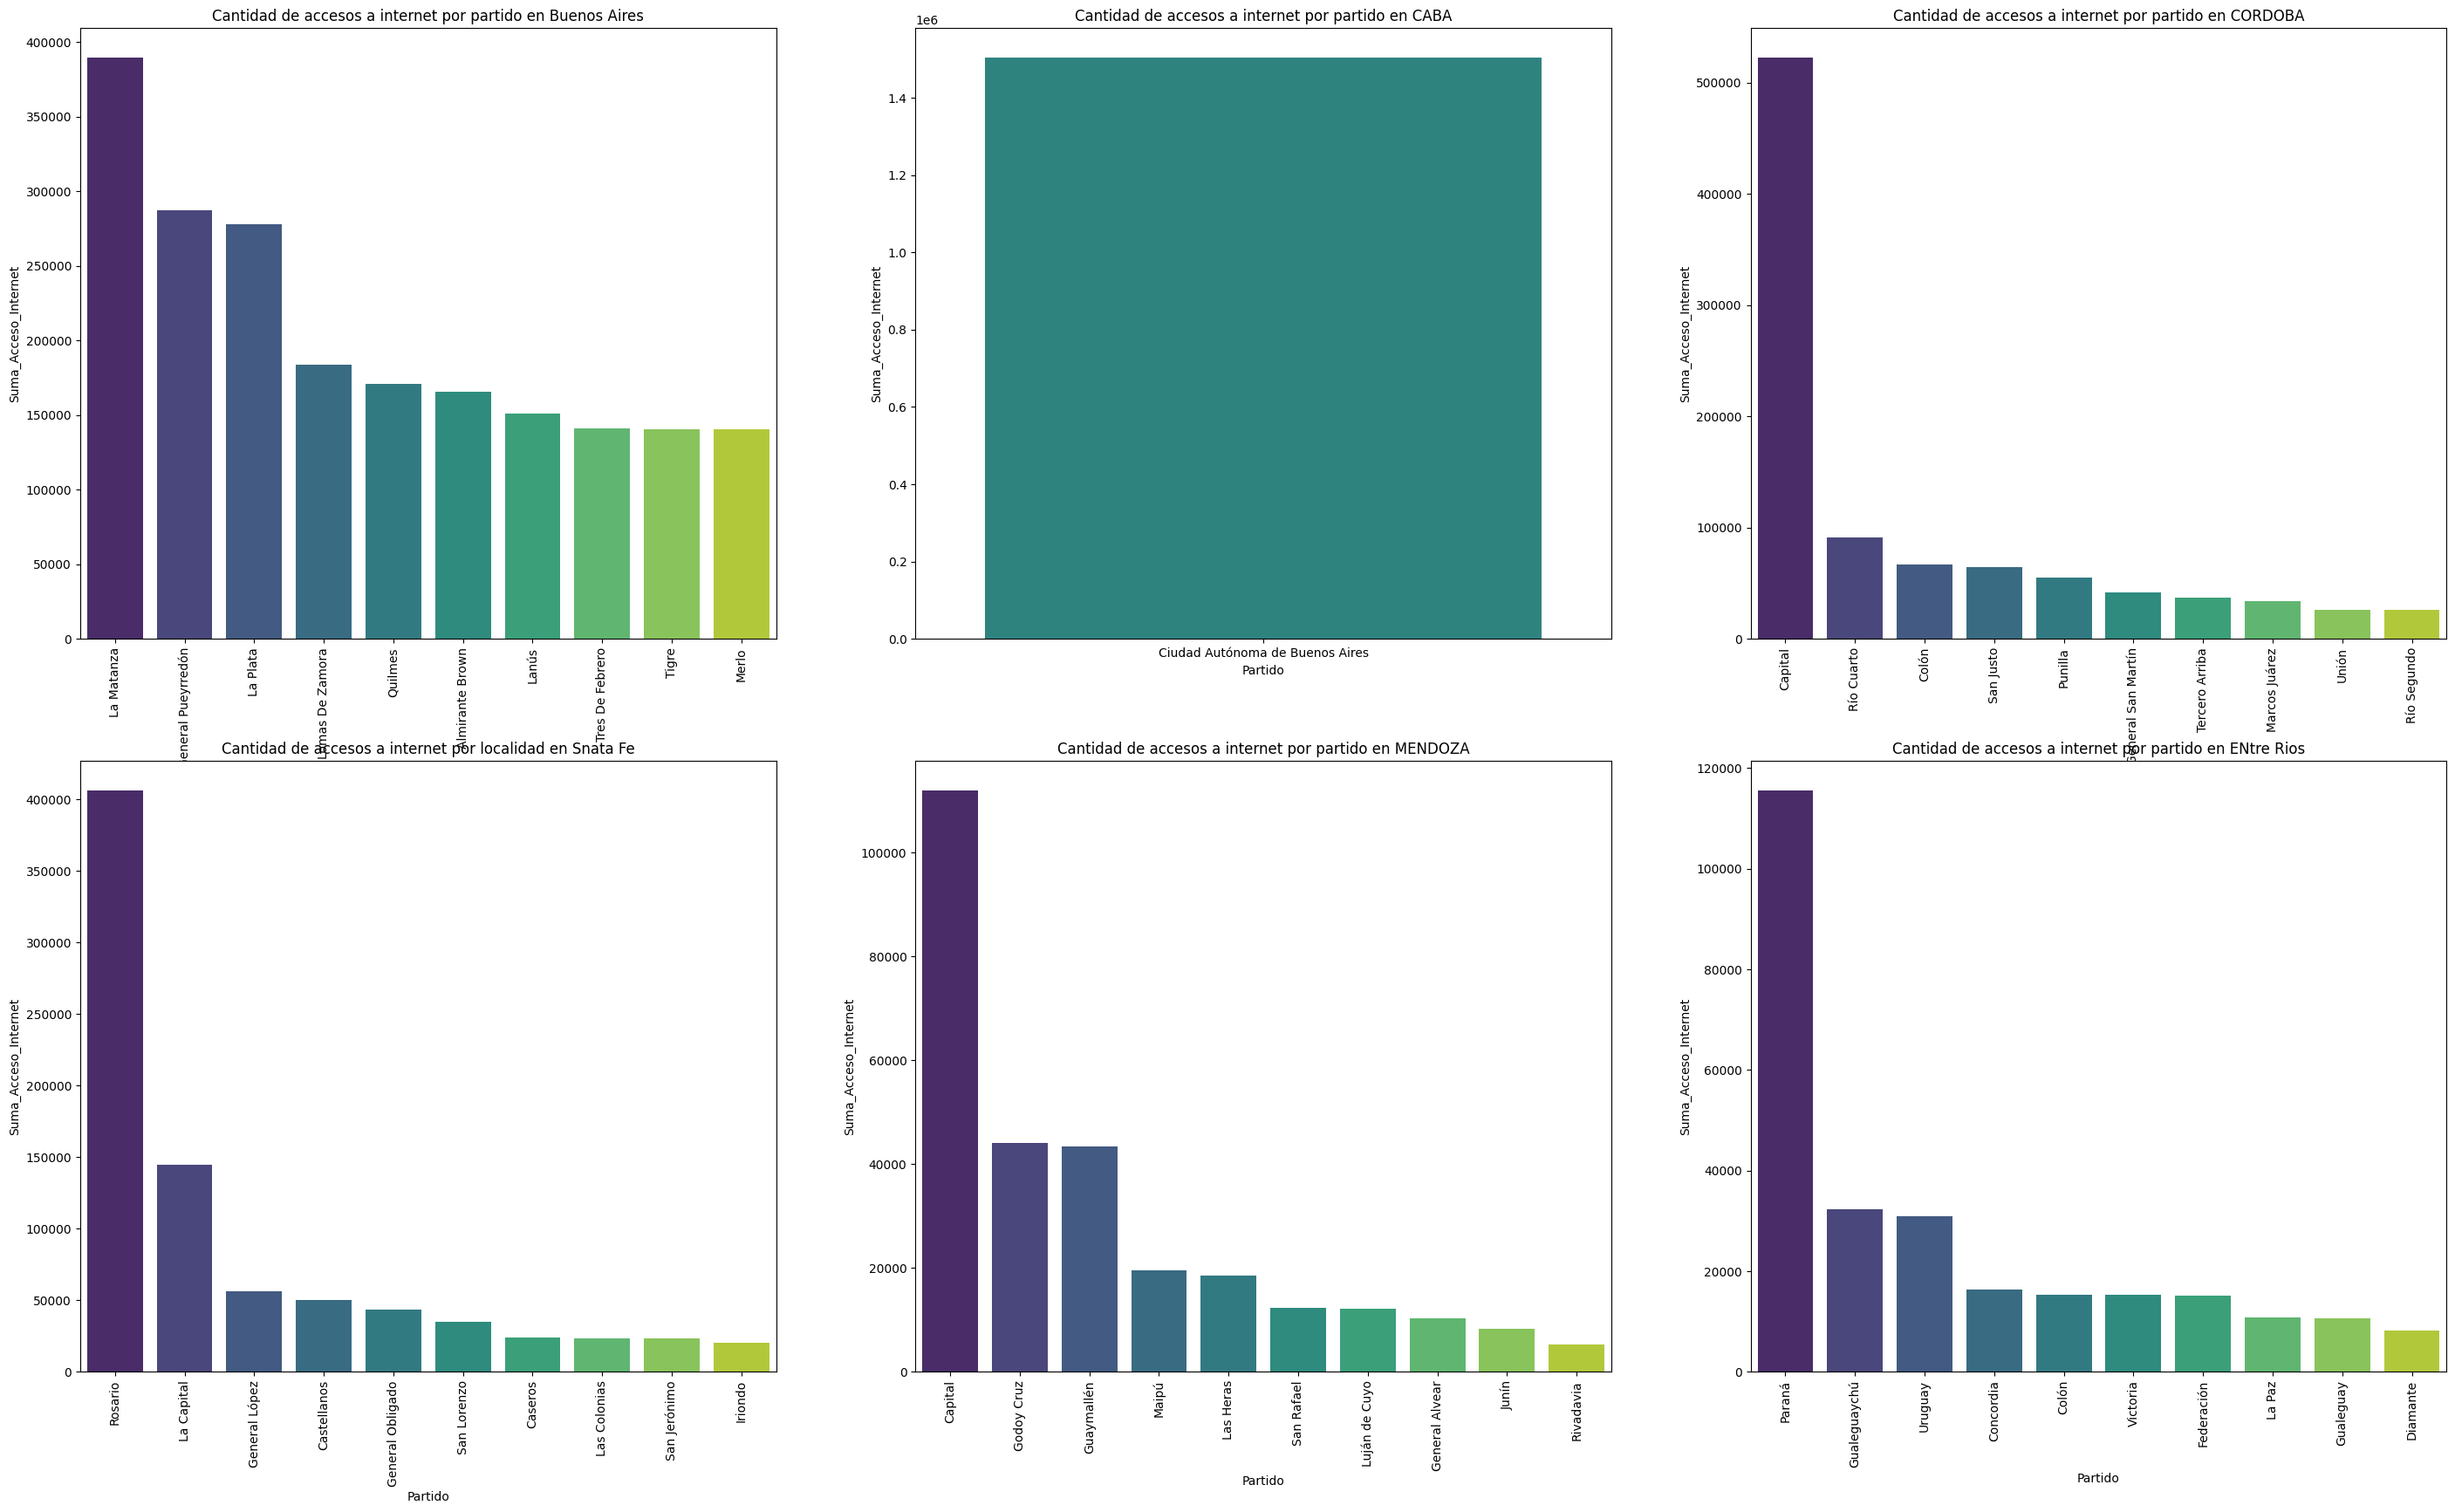

In [48]:
plt.figure(figsize = (35 ,20))

plt.subplot(2,3,1)
sns.barplot(x='Partido',y='Suma_Acceso_Internet',data=data_Buenos_Aires,hue='Partido',palette='viridis')
plt.title('Cantidad de accesos a internet por partido en Buenos Aires')
plt.xticks(rotation=90)

plt.subplot(2,3,2)
sns.barplot(x='Partido',y='Suma_Acceso_Internet',data=data_CABA,hue='Partido',palette='viridis')
plt.title('Cantidad de accesos a internet por partido en CABA')

plt.subplot(2,3,3)
sns.barplot(x='Partido',y='Suma_Acceso_Internet',data=data_CORDOBA,hue='Partido',palette='viridis')
plt.title('Cantidad de accesos a internet por partido en CORDOBA')
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.barplot(x='Partido',y='Suma_Acceso_Internet',data=data_SANTA_FE,hue='Partido',palette='viridis')
plt.title('Cantidad de accesos a internet por localidad en Snata Fe')
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.barplot(x='Partido',y='Suma_Acceso_Internet',data=data_MENDOZA,hue='Partido',palette='viridis')
plt.title('Cantidad de accesos a internet por partido en MENDOZA')
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.barplot(x='Partido',y='Suma_Acceso_Internet',data=data_RIOS,hue='Partido',palette='viridis')
plt.title('Cantidad de accesos a internet por partido en ENtre Rios')
plt.xticks(rotation=90)

plt.show()

## Conclusion graficas del numero de accesos a internet por Partido
- De las graficas anteriores se puede concluir que es en las capitales de cada provincia donde se observa la mayor cantidad de accesos a internet con exepcion de Santa Fe , donde es en Rosario donde hay mayor cantidad de accesos y esto se debe que Rosario tiene mas del doble de poblacion que la capital

# Analisis por tecnologias

In [49]:
# Observamos datos nulos
dataframes['accesos_tecnologia_localidad'].isnull().sum()

Provincia        280
Partido          280
Localidad        280
Link Indec       280
ADSL               0
CABLEMODEM         0
DIAL UP            0
FIBRA OPTICA       0
OTROS              0
SATELITAL          0
WIMAX              0
WIRELESS           0
Total general      0
dtype: int64

In [50]:
# Eliminamos las filas que tienen en provincia valores nulos
dataframes['accesos_tecnologia_localidad'] = dataframes['accesos_tecnologia_localidad'].dropna(subset=['Provincia'])


In [51]:
#Hacemos la sumatoria de accesos de internet por tecnologia

dicc_tecnologias ={
    'ADSL':0,
    'CABLEMODEM':0,
    'DIAL UP':0,
    'FIBRA OPTICA':0,
    'OTROS':0,
    'SATELITAL':0,
    'WIMAX':0,
    'WIRELESS':0,


}

for i in dicc_tecnologias.keys():
  dicc_tecnologias[i] = dataframes['accesos_tecnologia_localidad'][i].sum()



In [52]:
#Hacemos un dataframe con la cantidad y el porcentaje de accesos a internet por cada tecnologia
df_tecnologias = pd.DataFrame.from_dict(dicc_tecnologias,orient = 'index' , columns = ['Total Access'])
df_tecnologias['% Total'] = df_tecnologias['Total Access'] / df_tecnologias['Total Access'].sum() * 100
df_tecnologias.sort_values(by='% Total',ascending=False)

,Total Access,% Total
CABLEMODEM,5986957,51.464598
FIBRA OPTICA,4015101,34.514288
ADSL,774475,6.657480
WIRELESS,598682,5.146342
OTROS,241030,2.071923
DIAL UP,11793,0.101374
SATELITAL,2930,0.025187
WIMAX,2188,0.018808


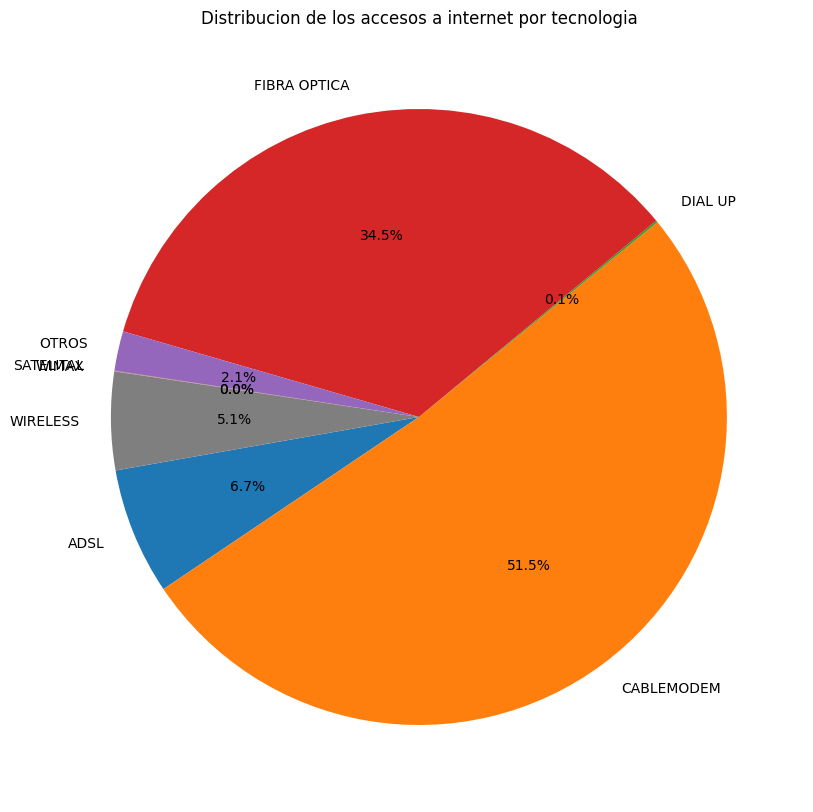

In [53]:
#Hacemos un grafico tipo pie para observar la ditribucion de los acceos a internet las diferentees tecnologias
plt.figure(figsize=(10,10))
plt.pie(dicc_tecnologias.values(),labels=dicc_tecnologias.keys(),autopct='%1.1f%%',startangle=190)
plt.title('Distribucion de los accesos a internet por tecnologia')
plt.show()

#### De la siguiente grafica podemos concluir que la tecnologia mas utilizada para ladistribucion de internet es cable modem seguida de  fibra optica ,ADLS y wireless . Tecnologias como Dial up , ximax y satelital son medios poco utilizados

## Ahora obtendremos el numero de conexiones entre provinicia y tecnologia

In [54]:
data_tec_loc = dataframes['accesos_tecnologia_localidad'].groupby('Provincia')[['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

In [55]:
data_tec_loc['Total'] = data_tec_loc.sum(axis=1)

In [56]:
data_tec_loc

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total
Provincia,,,,,,,,,
BUENOS AIRES,203297,2790663,5900,1799013,92651,1061,1682,150290,5044557
CABA,70108,1177475,2050,203756,46762,67,0,4493,1504711
CATAMARCA,5901,11025,1,56542,1,79,0,1384,74933
CHACO,11343,58929,5,64463,12323,76,0,8404,155543
CHUBUT,26306,77217,857,26356,8906,167,0,30867,170676
CORDOBA,102812,449784,63,458985,9268,95,71,61121,1082199
CORRIENTES,18390,85595,3,38268,5093,77,59,10409,157894
ENTRE RIOS,36574,158283,20,66180,11297,24,224,23950,296552
FORMOSA,9147,18631,0,17908,128,53,0,16851,62718


# Graficamos las 10 provincias que tienen mayor y menor demenada de Cable Modem

In [57]:
data_top_10_cable_modem = data_tec_loc.sort_values(by='CABLEMODEM',ascending=False)[:10]
data_Untop_10_cable_modem = data_tec_loc.sort_values(by='CABLEMODEM',ascending=True)[:10]

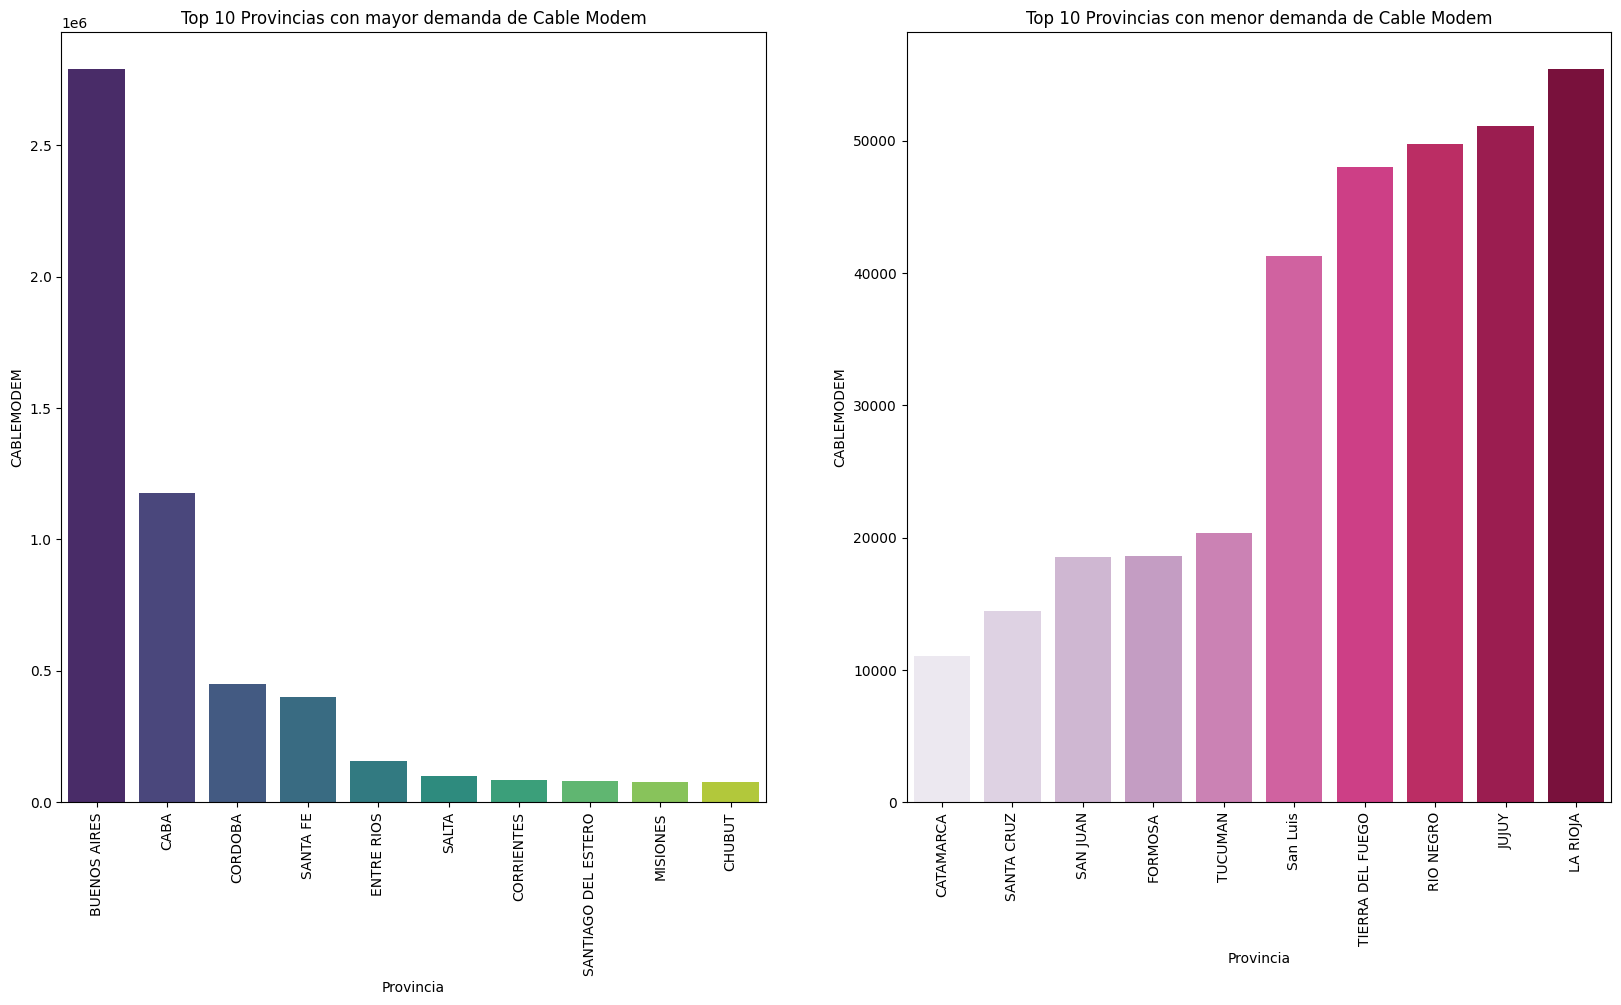

In [58]:
#hacemos un subplot para visulaizar las graficas de barras data_top_10 y data_Untop_10
plt.figure(figsize = (20 ,10))

plt.subplot(1,2,1)
sns.barplot(x='Provincia', y = 'CABLEMODEM', data = data_top_10_cable_modem, palette = 'viridis',hue = 'Provincia')
plt.title('Top 10 Provincias con mayor demanda de Cable Modem')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='Provincia', y = 'CABLEMODEM', data = data_Untop_10_cable_modem, palette = 'PuRd',hue = 'Provincia')
plt.title('Top 10 Provincias con menor demanda de Cable Modem')
plt.xticks(rotation = 90)

plt.show()

## Conclusion
- ### De esta grafica podemos concluir que las provincias con mayor cobertura de internet con la tecnologia del cable modem son las provicncas que tienen mayor accesos a internet y mayores velocidades de descarga esto debido a que elcablemodem entre sus ventajas es que no importa tanto la distancia del provedor al destino pudiendo llegar casi al 100% las velocidades contratadas ,por otra parte , las provincias que tienen menor cobertura con esta tecnologia son las que menor tiene acceso a internet y mas bjas velocidades por lo tanto para que las provincias que tienen menor acceso a intenet se debera dar cobertura con este tipo de tecnologia.

# Graficamos las 10 provincias que tienen mayor y menor demenada de Fibra Optica

In [59]:
data_top_10_fibra = data_tec_loc.sort_values(by='FIBRA OPTICA',ascending=False)[:10]
data_Untop_10_fibra = data_tec_loc.sort_values(by='FIBRA OPTICA',ascending=True)[:10]

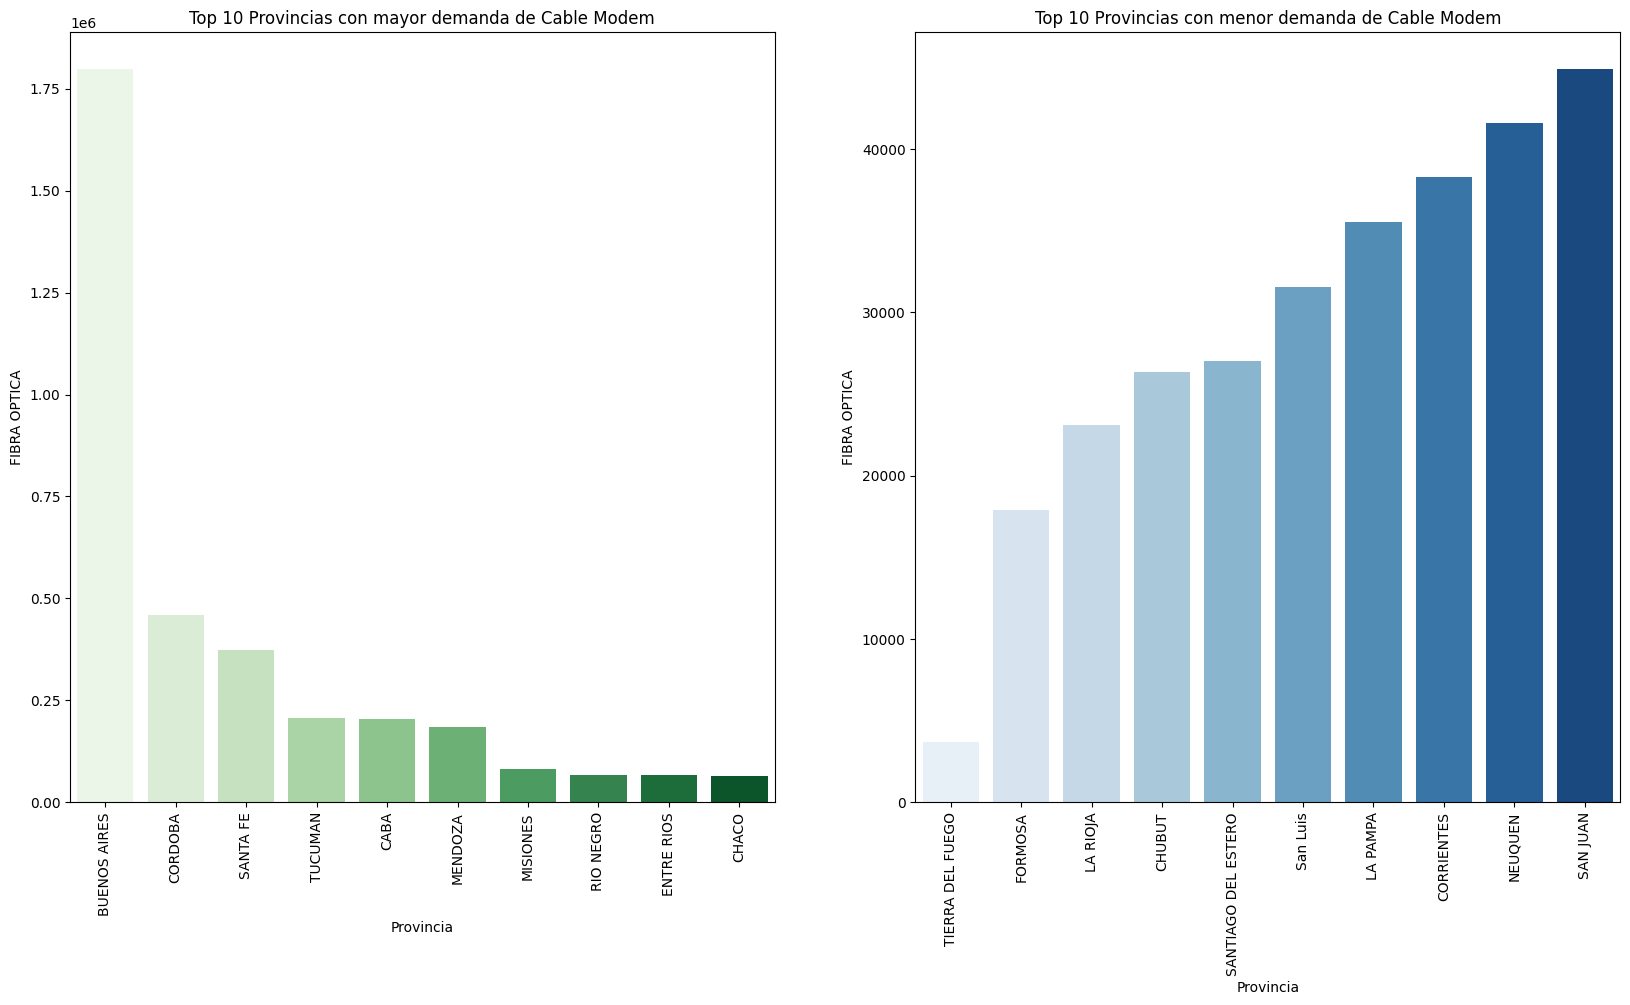

In [60]:
#hacemos un subplot para visulaizar las graficas de barras data_top_10 y data_Untop_10
plt.figure(figsize = (20 ,10))

plt.subplot(1,2,1)
sns.barplot(x='Provincia', y = 'FIBRA OPTICA', data = data_top_10_fibra, palette = 'Greens',hue = 'Provincia')
plt.title('Top 10 Provincias con mayor demanda de Cable Modem')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='Provincia', y = 'FIBRA OPTICA', data = data_Untop_10_fibra, palette = 'Blues',hue = 'Provincia')
plt.title('Top 10 Provincias con menor demanda de Cable Modem')
plt.xticks(rotation = 90)

plt.show()

### Para la tecnologia de fibra optica podemos visualizar que las provincias con mayor uso de esta tecnologia son las provincias que tienen mayor acceso a internet y las provincias que tienen menos uso son de las provincias con menor acceso a internet.

# Graficamos las 10 provincias que tienen mayor y menor demenada satelital

In [61]:
data_top_10_satelital = data_tec_loc.sort_values(by='SATELITAL',ascending=False)[:10]
data_Untop_10_satelital = data_tec_loc.sort_values(by='SATELITAL',ascending=True)[:10]

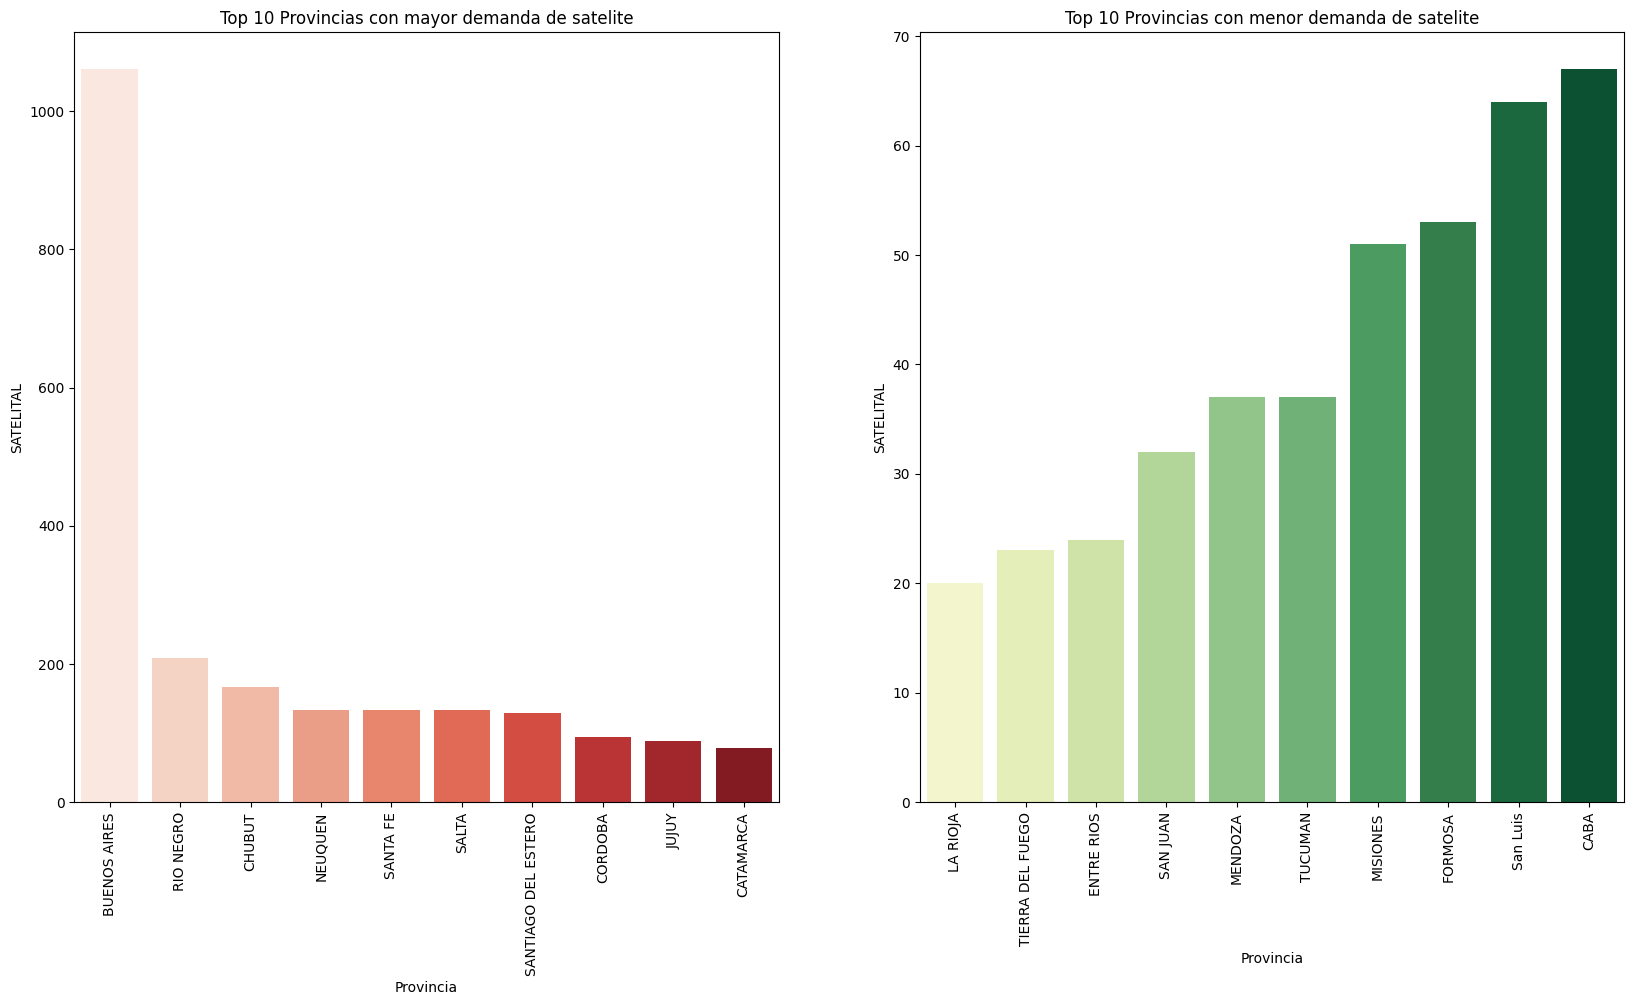

In [62]:
#hacemos un subplot para visulaizar las graficas de barras data_top_10 y data_Untop_10
plt.figure(figsize = (20 ,10))

plt.subplot(1,2,1)
sns.barplot(x='Provincia', y = 'SATELITAL', data = data_top_10_satelital, palette = 'Reds',hue = 'Provincia')
plt.title('Top 10 Provincias con mayor demanda de satelite')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='Provincia', y = 'SATELITAL', data = data_Untop_10_satelital, palette = 'YlGn',hue = 'Provincia')
plt.title('Top 10 Provincias con menor demanda de satelite')
plt.xticks(rotation = 90)

plt.show()

Aparte buenos Aires se presenta que las ciudades de Rio Negro y Chubut son las provincias que tienen mayor uso satelital esto es debido a que somn provincias de dificl acceso

# Graficas de velocidad promedio por año

## Grafica de velocidad promedio por cada año Totales

In [63]:
vel_totales = dataframes['totales_vmd']

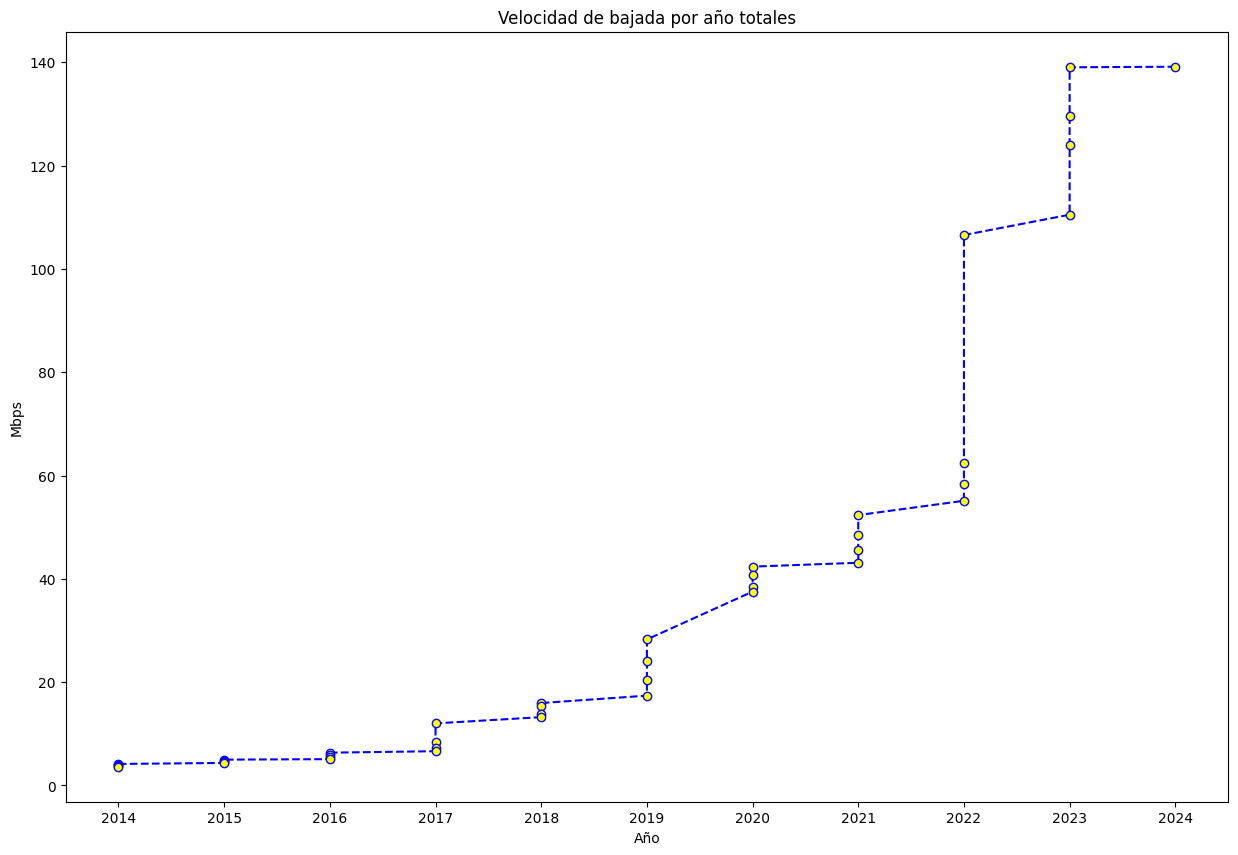

In [64]:
#Graficamos un lineplot por año
plt.figure(figsize=(15,10))
plt.title("Velocidad de bajada por año totales")
plt.plot('Año', 'Mbps (Media de bajada)', data=vel_totales, marker='o',ls="--",c='blue',mfc="yellow")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')
plt.show()

Obtenemos la taza de crecimiento por año/trimestre

In [65]:
#ordenamos el data set vel_totales por año
vel_totales = vel_totales.sort_values(by='Año')

In [66]:
vel_totales['Taza crecimiento'] = vel_totales['Mbps (Media de bajada)'].pct_change() * 100

In [67]:
vel_totales

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,Taza crecimiento
40,2014,1,3.617127,Ene-Mar 2014,NaN
37,2014,4,4.156888,Oct-Dic 2014,14.922374
39,2014,2,3.758712,Abr-Jun 2014,-9.578699
38,2014,3,3.867265,Jul-Sept 2014,2.888032
33,2015,4,4.990449,Oct-Dic 2015,29.043365
36,2015,1,4.350279,Ene-Mar 2015,-12.827905
35,2015,2,4.545381,Abr-Jun 2015,4.484830
34,2015,3,4.788911,Jul-Sept 2015,5.357739
29,2016,4,6.337384,Oct-Dic 2016,32.334552
30,2016,3,5.938777,Jul-Sept 2016,-6.289780


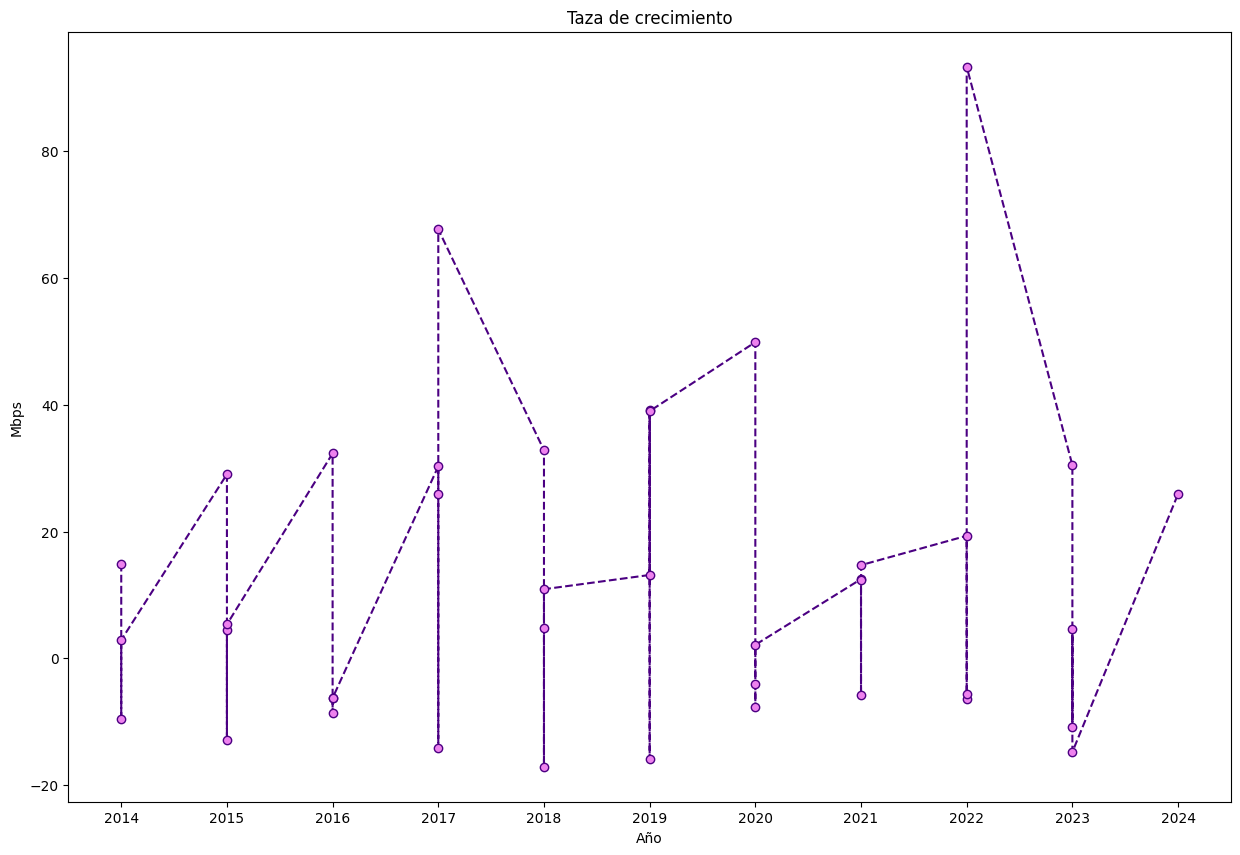

In [68]:
#Graficamos un lineplot por año
plt.figure(figsize=(15,10))
plt.title("Taza de crecimiento")
plt.plot('Año', 'Taza crecimiento', data=vel_totales, marker='o',ls="--",c='indigo',mfc="violet")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')
plt.show()

## De acuerdo a los graficos anteriores se puede concluir que durante el periodo 2014 - 2017 hubo casi un nulo crecimiento en el consumo de internet , durante el periodo de 2017-2019 el crecimiento fue minimo y duranteel perido de 2019 - 2024 se puede observar que hubo un incremento significativo siendo el 4to trimestre del 2022 donde se logro el mayor crecimiento en consumo de Mbps con una taza de 70.26 .

## La mayor taza de crecimiento se observa que fue del 2017 al 2018 y taza mas negativa se encuentra a finales del 2016 y principios del 2017

# - Graficas de promedio de velocidad por año y por provincia

In [69]:
# obtenemos la velocidades promedio de la provincia Buenos Aires atraves de los años
vel_BA = dataframes['velocidad_por_prov'][dataframes['velocidad_por_prov']['Provincia'] == 'Buenos Aires']


In [70]:
# obtenemos la velocidades promedio de la provincia Buenos Aires atraves de los años
vel_CABA = dataframes['velocidad_por_prov'][dataframes['velocidad_por_prov']['Provincia'] == 'Capital Federal']


In [71]:
# obtenemos la velocidades promedio de la provincia Buenos Aires atraves de los años
vel_CORDOBA = dataframes['velocidad_por_prov'][dataframes['velocidad_por_prov']['Provincia'] == 'Córdoba']

In [72]:
vel_TF = dataframes['velocidad_por_prov'][dataframes['velocidad_por_prov']['Provincia'] == 'Tierra Del Fuego']

In [73]:
vel_Formosa = dataframes['velocidad_por_prov'][dataframes['velocidad_por_prov']['Provincia'] == 'Formosa']

In [74]:
vel_CATAMARCA = dataframes['velocidad_por_prov'][dataframes['velocidad_por_prov']['Provincia'] == 'Catamarca']

Text(0, 0.5, 'Mbps')

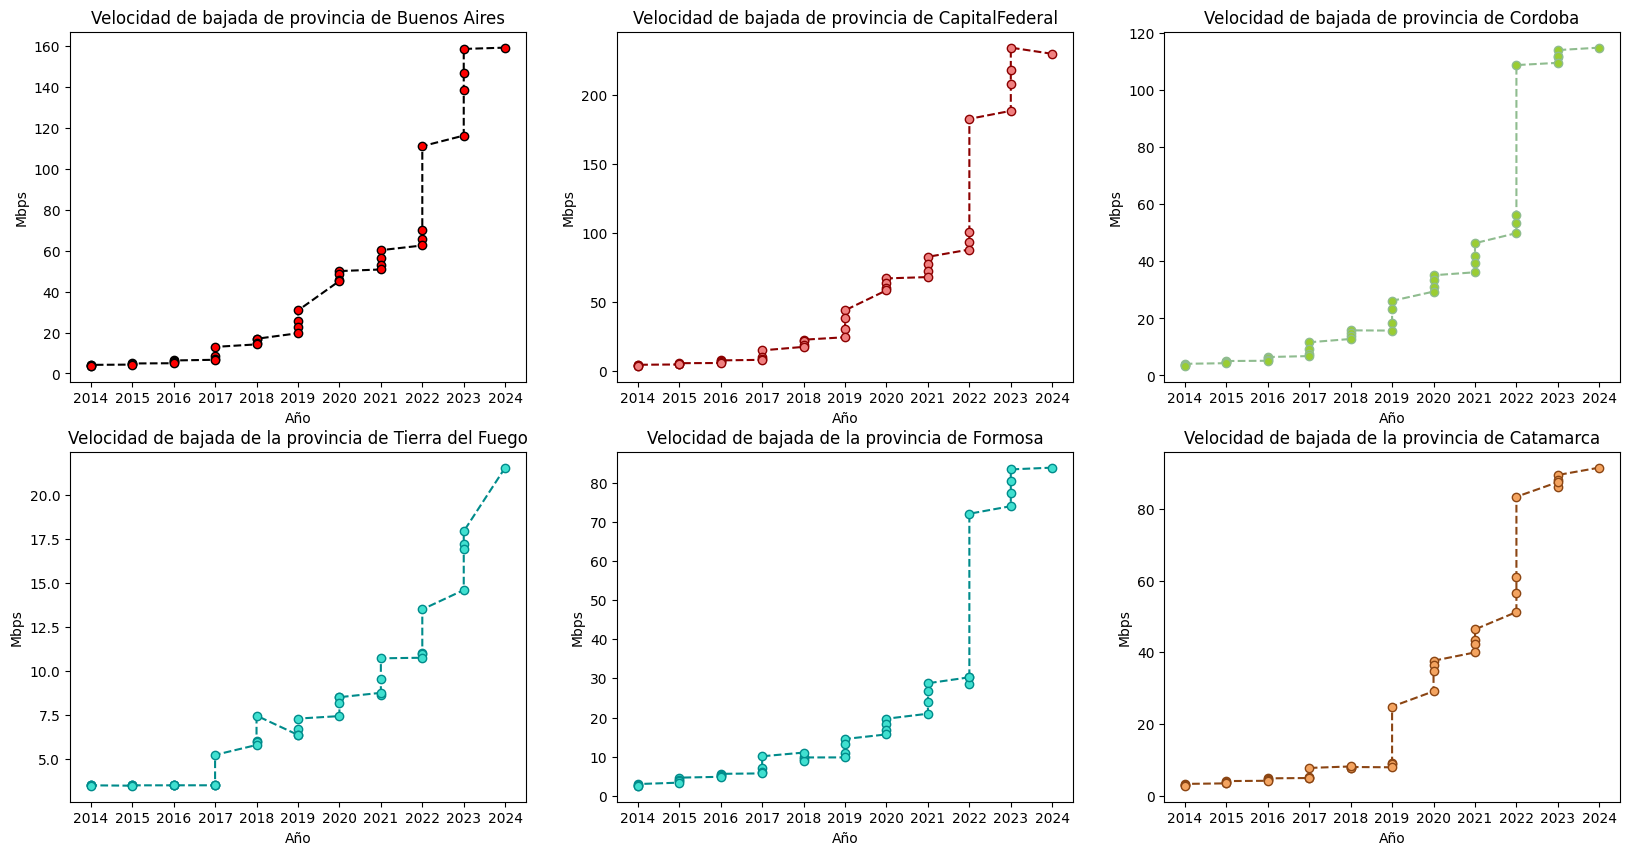

In [75]:
#hacemos un subplot para visulaizar las graficas de barras data_top_10 y data_Untop_10
plt.figure(figsize = (20 ,10))

plt.subplot(2,3,1)
plt.title("Velocidad de bajada de provincia de Buenos Aires")
plt.plot('Año', 'Mbps (Media de bajada)', data=vel_BA, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')

plt.subplot(2,3,2)
plt.title("Velocidad de bajada de provincia de CapitalFederal")
plt.plot('Año', 'Mbps (Media de bajada)', data=vel_CABA, marker='o',ls="--",c='darkred',mfc="lightcoral")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')


plt.subplot(2,3,3)
plt.title("Velocidad de bajada de provincia de Cordoba")
plt.plot('Año', 'Mbps (Media de bajada)', data=vel_CORDOBA, marker='o',ls="--",c='darkseagreen',mfc="yellowgreen")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')

plt.subplot(2,3,4)
plt.title("Velocidad de bajada de la provincia de Tierra del Fuego")
plt.plot('Año', 'Mbps (Media de bajada)', data=vel_TF, marker='o',ls="--",c='darkcyan',mfc="turquoise")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')

plt.subplot(2,3,5)
plt.title("Velocidad de bajada de la provincia de Formosa")
plt.plot('Año', 'Mbps (Media de bajada)', data=vel_Formosa, marker='o',ls="--",c='darkcyan',mfc="turquoise")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')

plt.subplot(2,3,6)
plt.title("Velocidad de bajada de la provincia de Catamarca")
plt.plot('Año', 'Mbps (Media de bajada)', data=vel_CATAMARCA, marker='o',ls="--",c='saddlebrown',mfc="sandybrown")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Mbps')


## De las graficas anteriores se puede observar que tanto las provincias con mayor acceso a internet y las provincias con menos acceso a internet han tenido un crecimiento homogeneo por lo tanto se puedeconcluir que el crecimiento en el consumo de megas de las provincias de Argentina a sido a la par.

# Tazas de crecimiento de velocidad por Provincia

In [76]:
provincias = dataframes['velocidad_por_prov']['Provincia'].unique()

In [77]:
data_tazas_crecimiento = pd.DataFrame(columns=['Provincia', 'Taza Crecimiento'])

In [78]:
data_tazas_crecimiento['Provincia'] = provincias

In [79]:
lista_tazas = []

for provincia in provincias:
   val_prov =  dataframes['velocidad_por_prov'][dataframes['velocidad_por_prov']['Provincia'] == provincia]
   val_prov = val_prov.sort_values(by=['Año','Trimestre'],ascending=True)
   val_prov = val_prov['Mbps (Media de bajada)'].pct_change() * 100
   lista_tazas.append(val_prov.mean())



In [80]:
data_tazas_crecimiento['Taza Crecimiento'] = lista_tazas

In [81]:
data_tazas_crecimiento

,Provincia,Taza Crecimiento
0,Buenos Aires,10.492001
1,Capital Federal,11.357909
2,Catamarca,11.012688
3,Chaco,9.964490
4,Chubut,5.292493
5,Córdoba,9.934360
6,Corrientes,10.026772
7,Entre Ríos,9.941583
8,Formosa,10.531667
9,Jujuy,7.921043


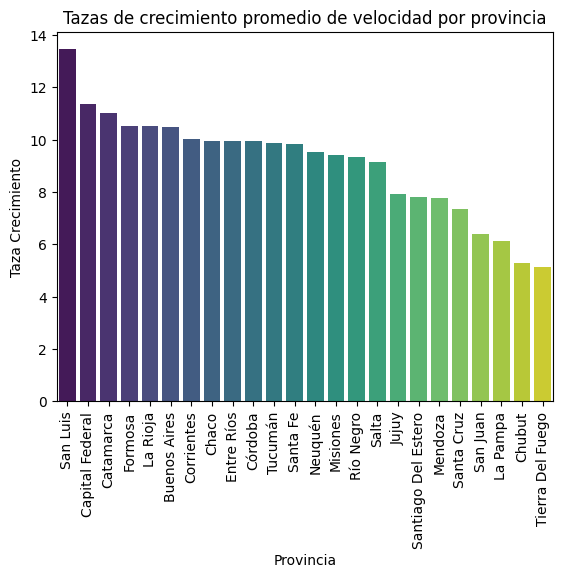

In [82]:
sns.barplot(x='Provincia',y='Taza Crecimiento',data=data_tazas_crecimiento.sort_values(by='Taza Crecimiento',ascending=False),palette='viridis',hue='Provincia')
plt.title('Tazas de crecimiento promedio de velocidad por provincia')
plt.xticks(rotation=90)
plt.show()

## De la grafica de tazas de crecimiento por provincia podemos observar que la provincia de San Luis que es una de las que menor acceso a internet tienen es la que a tenido una myor taza de crecimiento.Las provincias de Catamarca y Formosa tienen una taza mayor o igual que las provincias que tienen mayor acceso que es la Capital y Buenos Aires.

# Graficas de Accesos por tecnologia en el tiempo

## Grafica de totales de acceso por tecnologia

In [83]:
tec_totales = dataframes['totales_accesos_por_tecnología']

In [84]:
tec_totales

,Año,Trimestre,ADSL,Cablemodem,Fibra_Optica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
5,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
6,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
7,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
8,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
9,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [85]:
tec_totales.shape

(41, 9)

In [86]:
list_tec = tec_totales.columns[2:7]

In [87]:
list_tec

Index(['ADSL', 'Cablemodem', 'Fibra_Optica', 'Wireless', 'Otros'], dtype='object')

Text(0, 0.5, 'Num_Accesos')

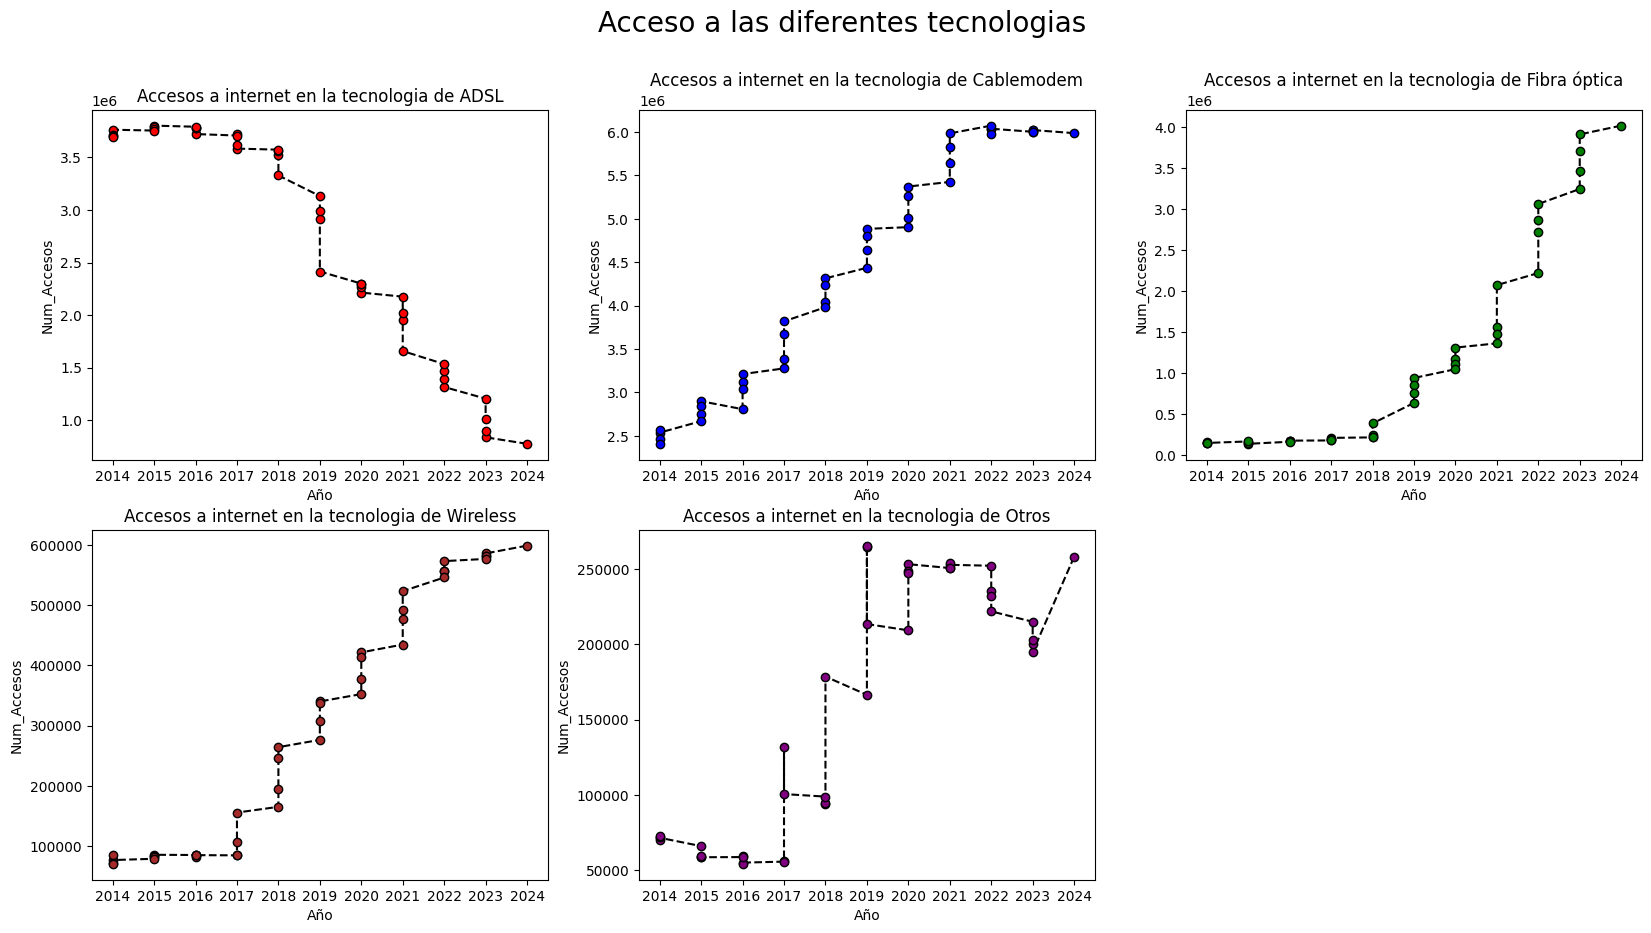

In [88]:
#hacemos un subplot para visulaizar las graficas de accesos por tecnologia
plt.figure(figsize = (20 ,10))


plt.suptitle('Acceso a las diferentes tecnologias', fontsize=20)

plt.subplot(2,3,1)
plt.title("Accesos a internet en la tecnologia de ADSL")
plt.plot('Año', 'ADSL', data=tec_totales[['Año','ADSL']], marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(2,3,2)
plt.title("Accesos a internet en la tecnologia de Cablemodem")
plt.plot('Año', 'Cablemodem', data=tec_totales[['Año','Cablemodem']], marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(2,3,3)
plt.title("Accesos a internet en la tecnologia de Fibra óptica")
plt.plot('Año', 'Fibra_Optica', data=tec_totales[['Año','Fibra_Optica']], marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(2,3,4)
plt.title("Accesos a internet en la tecnologia de Wireless")
plt.plot('Año', 'Wireless', data=tec_totales[['Año','Wireless']], marker='o',ls="--",c='black',mfc="brown")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(2,3,5)
plt.title("Accesos a internet en la tecnologia de Otros")
plt.plot('Año', 'Otros', data=tec_totales[['Año','Otros']], marker='o',ls="--",c='black',mfc="purple")
plt.xticks(np.arange(2014, 2025, 1))
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

## Tazas de crecimiento para las diferentes tecnologias

In [89]:
tec_totales_taza = tec_totales.sort_values(by=['Año','Trimestre'],ascending=True)

In [90]:
taza_tec = {}
for i in list_tec:
  val = tec_totales_taza[i].pct_change() * 100
  taza_tec[i] = val.mean()


In [91]:
df_taza_tec = pd.DataFrame.from_dict(taza_tec,orient='index',columns=['Taza'])

In [92]:
df_taza_tec

,Taza
ADSL,-3.715537
Cablemodem,2.331065
Fibra_Optica,9.339176
Wireless,5.856918
Otros,5.707941


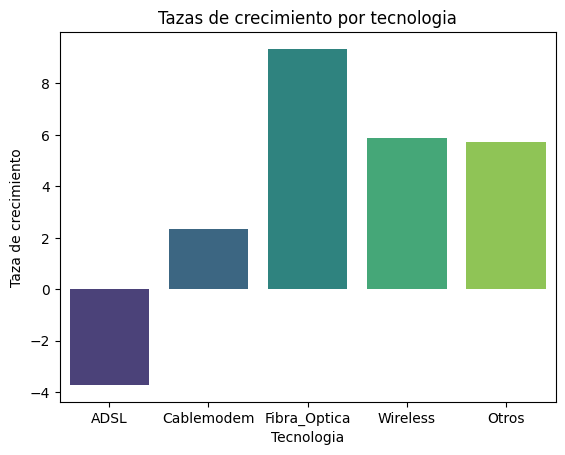

In [93]:
sns.barplot(x=df_taza_tec.index,y='Taza',data=df_taza_tec,palette='viridis',hue=df_taza_tec.index)
plt.title('Tazas de crecimiento por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Taza de crecimiento')
plt.show()

### Conclusion
- De los graficos anterior se puede concluir que la mayoria de las tecnologias a ido en crecimiento excepto por la tecnoligia ADSL la cul su uso disminuye esto se debe a que su tecnologia presenta muchosas desventajas sobre las demas tecnologias como es la atenuacion de la señal a mayores distancias por lo cual no es posible llevarlo a muchos lugares .Y es la fibra optica la tecnologia que mayor taza de crecimiento a tenido esto es debido a sus multiples beneficios sobre las demas tecnologias.

## Accesos por tecnologia por provincia a traves del tiempo

In [94]:
tec_provincia = dataframes['accesos_por_tecnología']

In [95]:
dataframes['accesos_por_tecnología']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0
...,...,...,...,...,...,...,...,...,...
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
983,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
984,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#convertimos las filas 2019 * de la columna año
dataframes['accesos_por_tecnología']['Año'] = dataframes['accesos_por_tecnología']['Año'].replace('2019 *','2019')


In [97]:
dataframes['accesos_por_tecnología']['Año'].isnull().sum()

np.int64(1)

In [98]:
#eliminamos valores nulos de la columna Año
dataframes['accesos_por_tecnología'] = dataframes['accesos_por_tecnología'].dropna(subset=['Año'])

In [99]:
#eliinamos la ultima fila
dataframes['accesos_por_tecnología'] = dataframes['accesos_por_tecnología'].drop(dataframes['accesos_por_tecnología'].index[-1])

In [100]:
#convertimos el tipo de dato Año a entero
dataframes['accesos_por_tecnología']['Año'] = dataframes['accesos_por_tecnología']['Año'].astype(int)

In [101]:
dataframes['accesos_por_tecnología']['Provincia'].unique()


array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [102]:
#Obtenemos dataframes por provincia
tec_provincia_BA = dataframes['accesos_por_tecnología'][dataframes['accesos_por_tecnología']['Provincia']=='Buenos Aires']
tec_provincia_CABA = dataframes['accesos_por_tecnología'][dataframes['accesos_por_tecnología']['Provincia'] =='Capital Federal']
tec_provincia_CORDOBA = dataframes['accesos_por_tecnología'][dataframes['accesos_por_tecnología']['Provincia'] =='Córdoba']
tec_provincia_Catamarca = dataframes['accesos_por_tecnología'][dataframes['accesos_por_tecnología']['Provincia'] =='Catamarca']
tec_provincia_Rioja = dataframes['accesos_por_tecnología'][dataframes['accesos_por_tecnología']['Provincia'] =='La Rioja']
tec_provincia_Formosa = dataframes['accesos_por_tecnología'][dataframes['accesos_por_tecnología']['Provincia'] =='Formosa']
tec_provincia_Fuego = dataframes['accesos_por_tecnología'][dataframes['accesos_por_tecnología']['Provincia'] =='Tierra Del Fuego']

In [103]:
def taza_crecimiento(data):
  """Funcion que obtiene un dataframe con las taza de crecimientode cada tecnologia"""
  data = data.sort_values(by='Año',ascending=True)
  taza_tec = {}
  for i in list_tec:
    val = data[i].pct_change() * 100
    taza_tec[i] = val.mean()
  df_taza_tec = pd.DataFrame.from_dict(taza_tec,orient='index',columns=['Taza'])
  return df_taza_tec

## Evolucion de acceso de tecnologias en Buenos Aires

In [104]:
taza_BA = taza_crecimiento(tec_provincia_BA)

KeyError: 'Fibra_Optica'

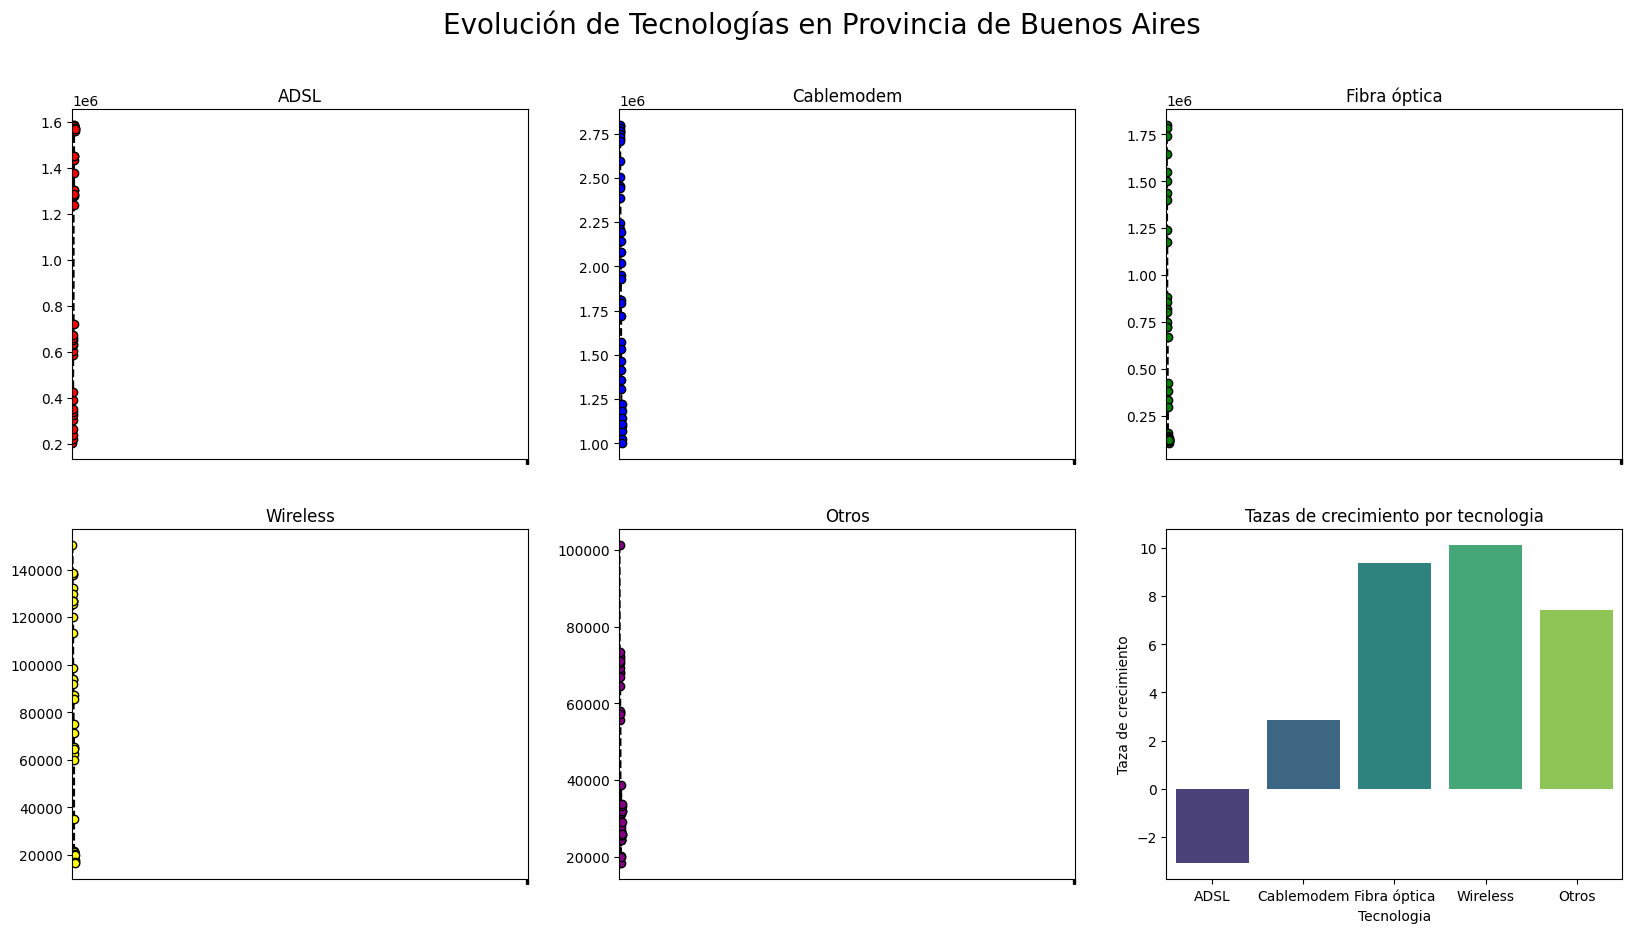

In [ ]:
plt.figure(figsize=(20,10))


plt.suptitle('Evolución de Tecnologías en Provincia de Buenos Aires', fontsize=20)

plt.subplot(2,3,1)
plt.plot('Año', 'ADSL', data=tec_provincia_BA, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('ADSL')

plt.subplot(2,3,2)
plt.plot('Año', 'Cablemodem', data=tec_provincia_BA, marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Cablemodem')

plt.subplot(2,3,3)
plt.plot('Año', 'Fibra óptica', data=tec_provincia_BA, marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Fibra óptica')

plt.subplot(2,3,4)
plt.plot('Año', 'Wireless', data=tec_provincia_BA, marker='o',ls="--",c='black',mfc="yellow")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Wireless')


plt.subplot(2,3,5)
plt.plot('Año', 'Otros', data=tec_provincia_BA, marker='o',ls="--",c='black',mfc="purple")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Otros')

plt.subplot(2,3,6)
sns.barplot(x=taza_BA.index , y='Taza', data=taza_BA, palette='viridis',hue=taza_BA.index)
plt.title('Tazas de crecimiento por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Taza de crecimiento')

plt.show()

## Evolucion de acceso de tecnologias en Caba

In [ ]:
taza_Caba = taza_crecimiento(tec_provincia_CABA)

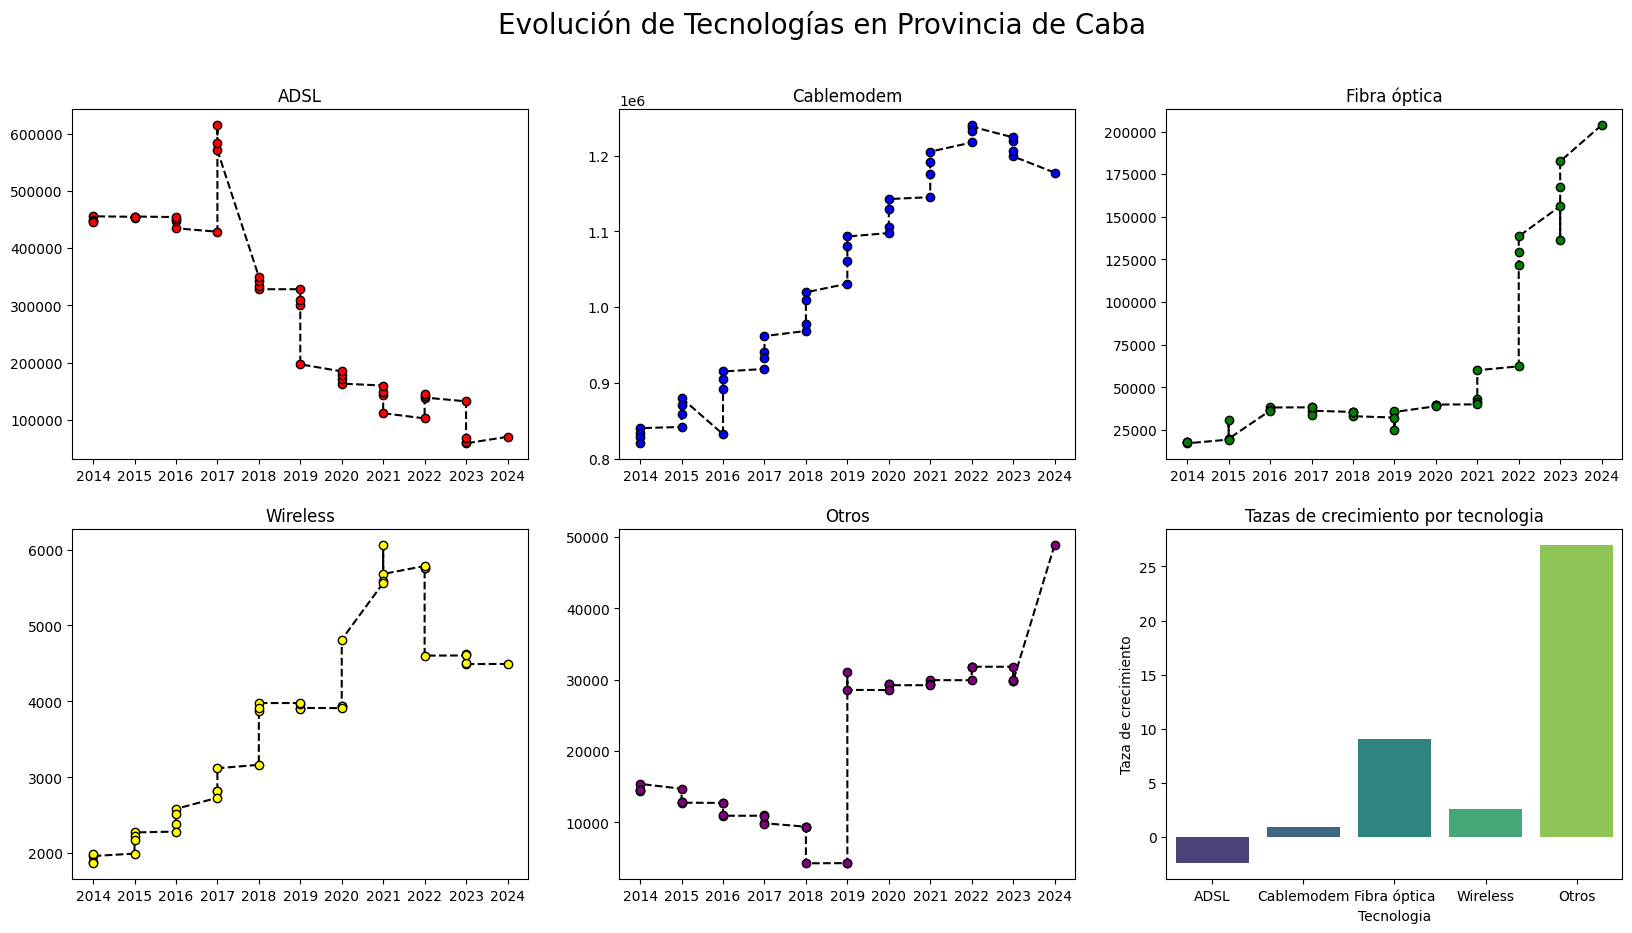

In [ ]:
plt.figure(figsize=(20,10))


plt.suptitle('Evolución de Tecnologías en Provincia de Caba', fontsize=20)

plt.subplot(2,3,1)
plt.plot('Año', 'ADSL', data=tec_provincia_CABA, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('ADSL')

plt.subplot(2,3,2)
plt.plot('Año', 'Cablemodem', data=tec_provincia_CABA, marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Cablemodem')

plt.subplot(2,3,3)
plt.plot('Año', 'Fibra óptica', data=tec_provincia_CABA, marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Fibra óptica')

plt.subplot(2,3,4)
plt.plot('Año', 'Wireless', data=tec_provincia_CABA, marker='o',ls="--",c='black',mfc="yellow")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Wireless')


plt.subplot(2,3,5)
plt.plot('Año', 'Otros', data=tec_provincia_CABA, marker='o',ls="--",c='black',mfc="purple")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Otros')

plt.subplot(2,3,6)
sns.barplot(x=taza_Caba.index , y='Taza', data=taza_Caba, palette='viridis',hue=taza_Caba.index)
plt.title('Tazas de crecimiento por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Taza de crecimiento')

plt.show()

## Evolucion de acceso de tecnologias en CORDOBA

In [ ]:
taza_CORDOBA = taza_crecimiento(tec_provincia_CORDOBA)

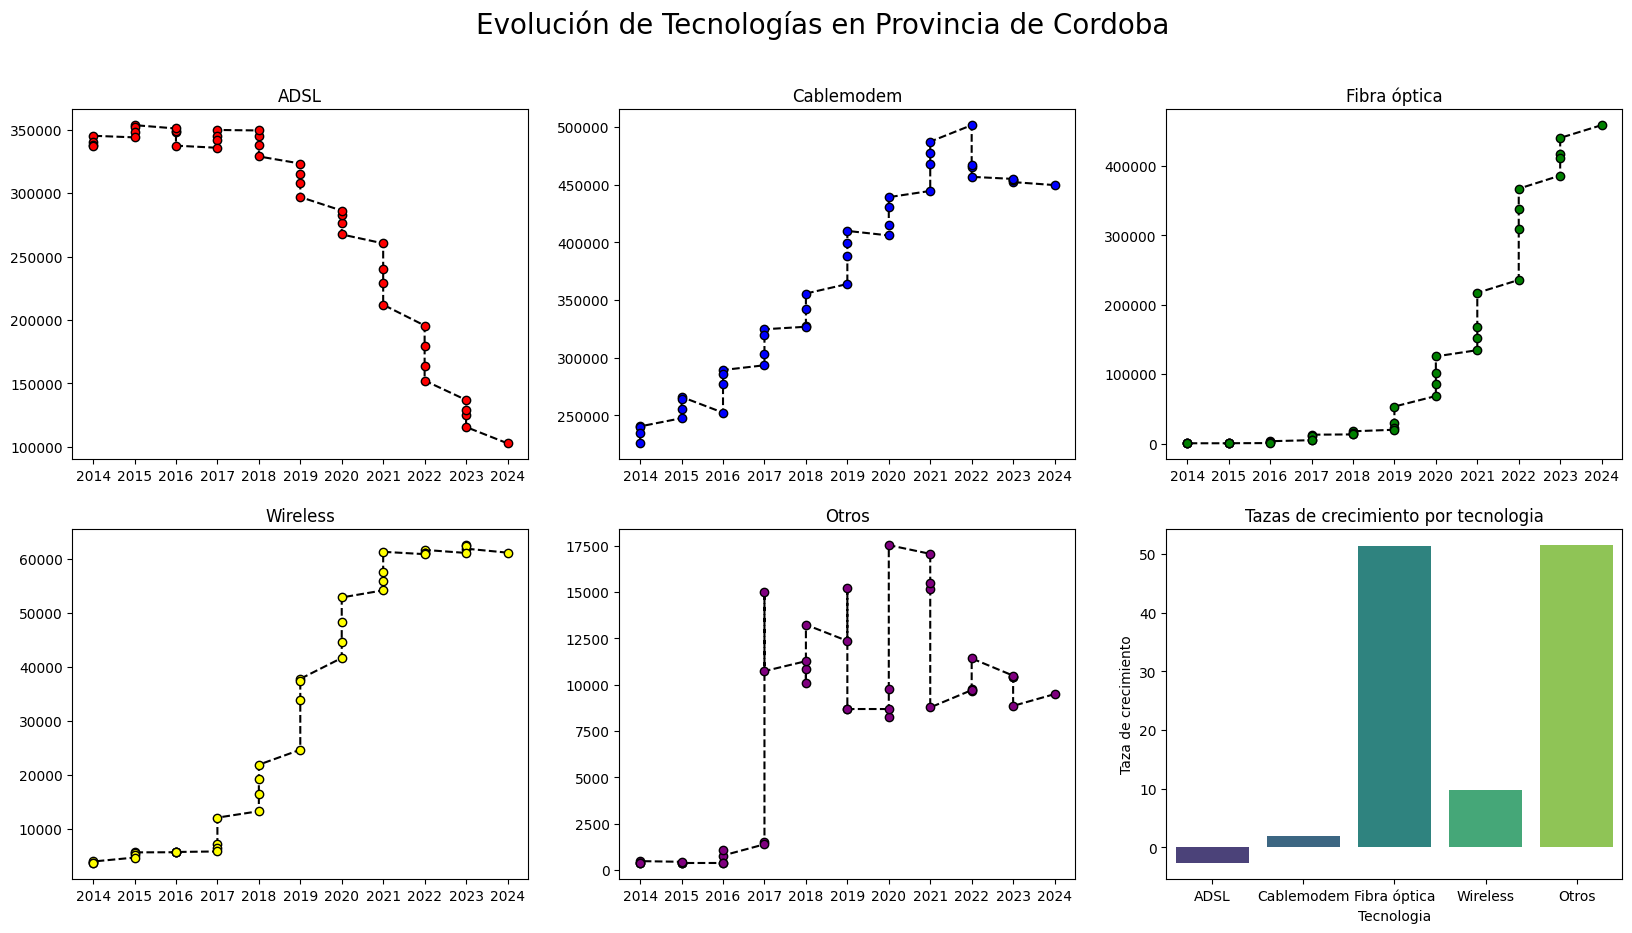

In [ ]:
plt.figure(figsize=(20,10))


plt.suptitle('Evolución de Tecnologías en Provincia de Cordoba', fontsize=20)

plt.subplot(2,3,1)
plt.plot('Año', 'ADSL', data=tec_provincia_CORDOBA, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('ADSL')

plt.subplot(2,3,2)
plt.plot('Año', 'Cablemodem', data=tec_provincia_CORDOBA, marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Cablemodem')

plt.subplot(2,3,3)
plt.plot('Año', 'Fibra óptica', data=tec_provincia_CORDOBA, marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Fibra óptica')

plt.subplot(2,3,4)
plt.plot('Año', 'Wireless', data=tec_provincia_CORDOBA, marker='o',ls="--",c='black',mfc="yellow")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Wireless')


plt.subplot(2,3,5)
plt.plot('Año', 'Otros', data=tec_provincia_CORDOBA, marker='o',ls="--",c='black',mfc="purple")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Otros')

plt.subplot(2,3,6)
sns.barplot(x=taza_CORDOBA.index , y='Taza', data=taza_CORDOBA, palette='viridis',hue=taza_CORDOBA.index)
plt.title('Tazas de crecimiento por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Taza de crecimiento')

plt.show()

## Evolucion de acceso de tecnologias en Catamarca

In [ ]:
tec_provincia_Catamarca = tec_provincia_Catamarca.replace(0,1)

In [ ]:
taza_Catamarca = taza_crecimiento(tec_provincia_Catamarca)

In [ ]:
taza_Catamarca

,Taza
ADSL,-2.466114
Cablemodem,98.488313
Fibra óptica,4143.090343
Wireless,625.389390
Otros,313.589849


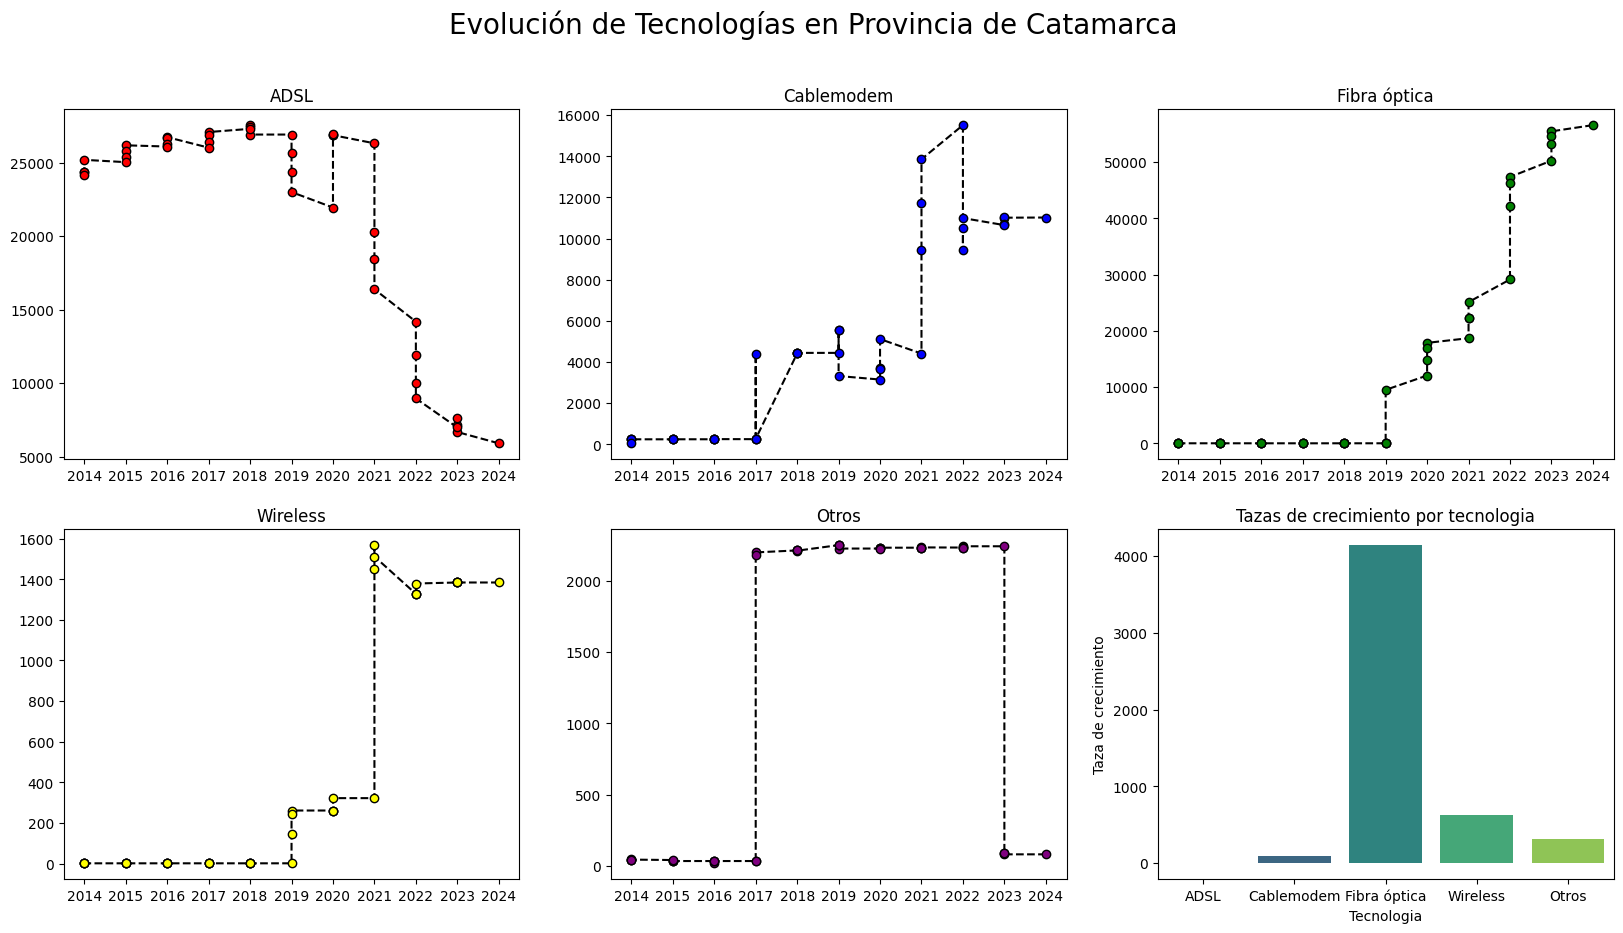

In [ ]:
plt.figure(figsize=(20,10))


plt.suptitle('Evolución de Tecnologías en Provincia de Catamarca', fontsize=20)

plt.subplot(2,3,1)
plt.plot('Año', 'ADSL', data=tec_provincia_Catamarca, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('ADSL')

plt.subplot(2,3,2)
plt.plot('Año', 'Cablemodem', data=tec_provincia_Catamarca, marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Cablemodem')

plt.subplot(2,3,3)
plt.plot('Año', 'Fibra óptica', data=tec_provincia_Catamarca, marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Fibra óptica')

plt.subplot(2,3,4)
plt.plot('Año', 'Wireless', data=tec_provincia_Catamarca, marker='o',ls="--",c='black',mfc="yellow")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Wireless')


plt.subplot(2,3,5)
plt.plot('Año', 'Otros', data=tec_provincia_Catamarca, marker='o',ls="--",c='black',mfc="purple")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Otros')

plt.subplot(2,3,6)
sns.barplot(x=taza_Catamarca.index , y='Taza', data=taza_Catamarca, palette='viridis',hue=taza_Catamarca.index)
plt.title('Tazas de crecimiento por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Taza de crecimiento')

plt.show()

## Evolucion de acceso de tecnologias en La Rioja

In [ ]:
tec_provincia_Rioja = tec_provincia_Rioja.replace(0,1)

In [ ]:
taza_Rioja = taza_crecimiento(tec_provincia_Rioja)

In [ ]:
taza_Rioja

,Taza
ADSL,-3.036751
Cablemodem,174914.501867
Fibra óptica,47238.064856
Wireless,747.484871
Otros,0.595304


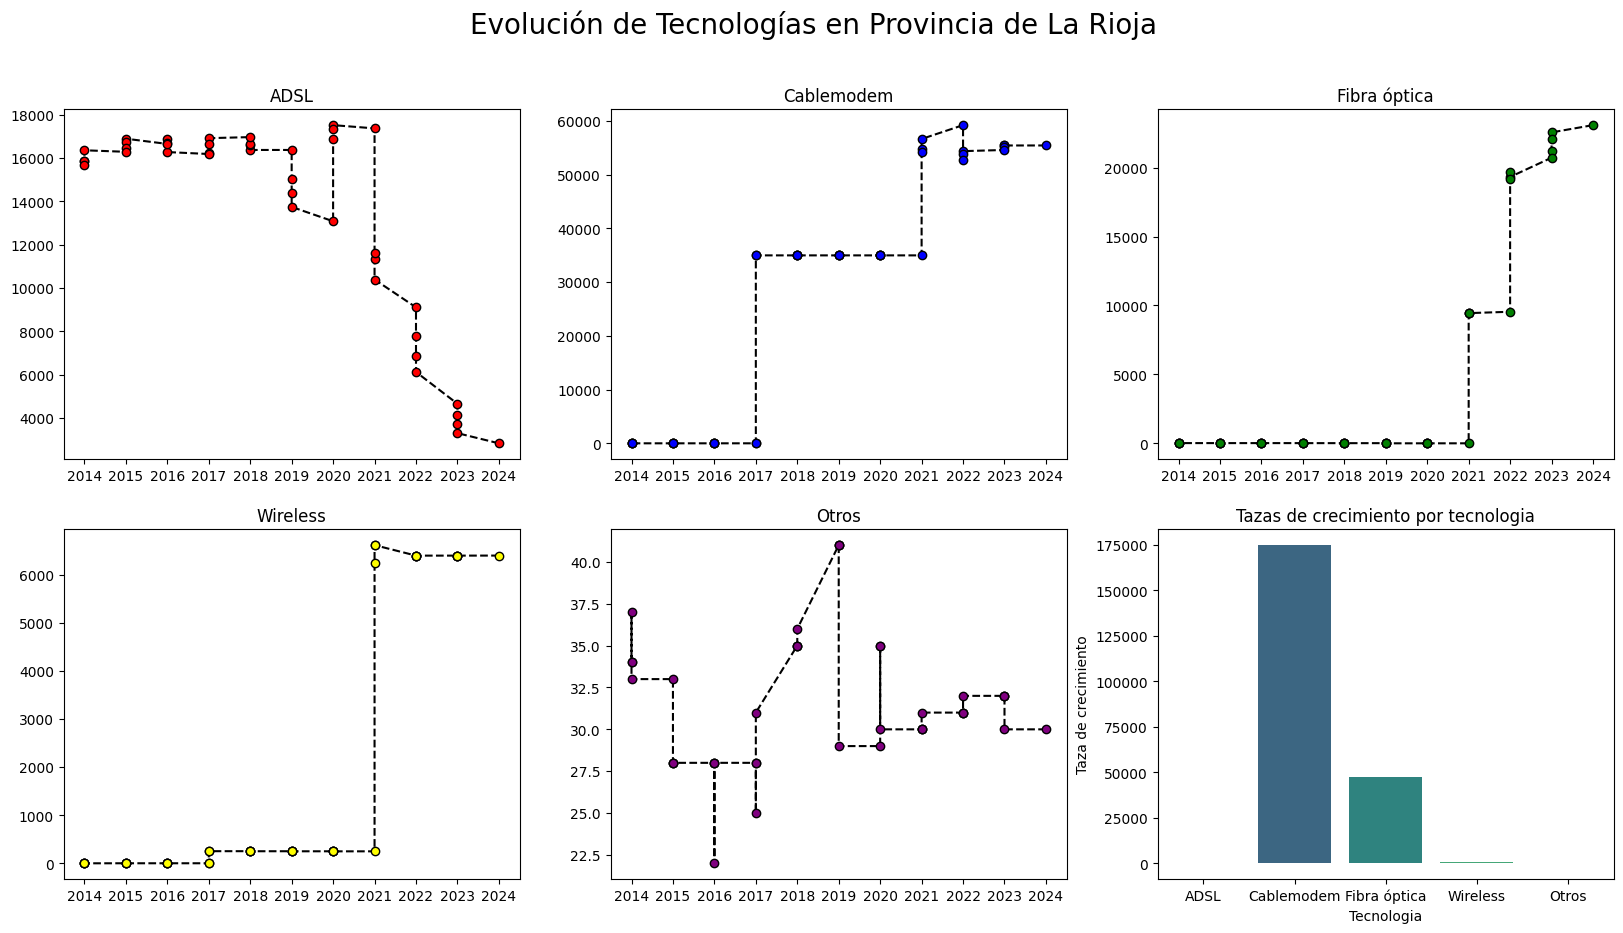

In [ ]:
plt.figure(figsize=(20,10))


plt.suptitle('Evolución de Tecnologías en Provincia de La Rioja', fontsize=20)

plt.subplot(2,3,1)
plt.plot('Año', 'ADSL', data=tec_provincia_Rioja, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('ADSL')

plt.subplot(2,3,2)
plt.plot('Año', 'Cablemodem', data=tec_provincia_Rioja, marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Cablemodem')

plt.subplot(2,3,3)
plt.plot('Año', 'Fibra óptica', data=tec_provincia_Rioja, marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Fibra óptica')

plt.subplot(2,3,4)
plt.plot('Año', 'Wireless', data=tec_provincia_Rioja, marker='o',ls="--",c='black',mfc="yellow")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Wireless')


plt.subplot(2,3,5)
plt.plot('Año', 'Otros', data=tec_provincia_Rioja, marker='o',ls="--",c='black',mfc="purple")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Otros')

plt.subplot(2,3,6)
sns.barplot(x=taza_Rioja.index , y='Taza', data=taza_Rioja, palette='viridis',hue=taza_Rioja.index)
plt.title('Tazas de crecimiento por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Taza de crecimiento')

plt.show()

## Evolucion de acceso de tecnologias en Formosa

In [ ]:
tec_provincia_Formosa = tec_provincia_Formosa.replace(0,1)

In [ ]:
taza_Formosa = taza_crecimiento(tec_provincia_Formosa)

In [ ]:
taza_Formosa

,Taza
ADSL,-1.855666
Cablemodem,4.481380
Fibra óptica,195.677195
Wireless,4248.158975
Otros,32.052380


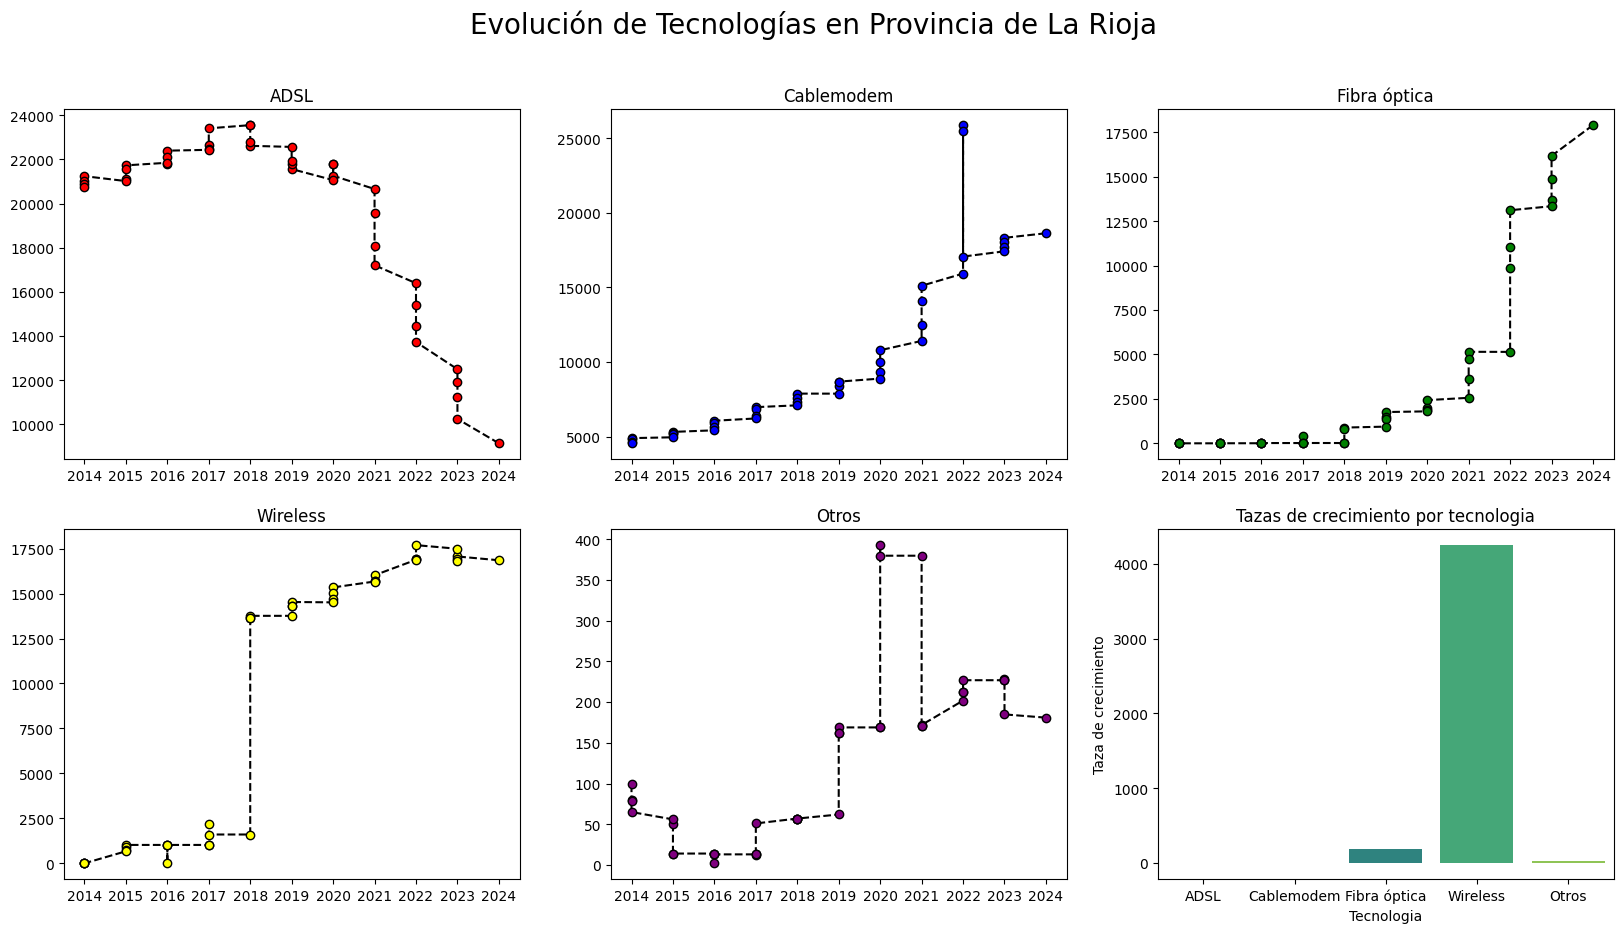

In [ ]:
plt.figure(figsize=(20,10))


plt.suptitle('Evolución de Tecnologías en Provincia de La Rioja', fontsize=20)

plt.subplot(2,3,1)
plt.plot('Año', 'ADSL', data=tec_provincia_Formosa, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('ADSL')

plt.subplot(2,3,2)
plt.plot('Año', 'Cablemodem', data=tec_provincia_Formosa, marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Cablemodem')

plt.subplot(2,3,3)
plt.plot('Año', 'Fibra óptica', data=tec_provincia_Formosa, marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Fibra óptica')

plt.subplot(2,3,4)
plt.plot('Año', 'Wireless', data=tec_provincia_Formosa, marker='o',ls="--",c='black',mfc="yellow")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Wireless')


plt.subplot(2,3,5)
plt.plot('Año', 'Otros', data=tec_provincia_Formosa, marker='o',ls="--",c='black',mfc="purple")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Otros')

plt.subplot(2,3,6)
sns.barplot(x=taza_Formosa.index , y='Taza', data=taza_Formosa, palette='viridis',hue=taza_Formosa.index)
plt.title('Tazas de crecimiento por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Taza de crecimiento')

plt.show()

# Penetracion de internet

## Penetracion totales

In [ ]:
penetracion_total = dataframes['penetracion_totales']

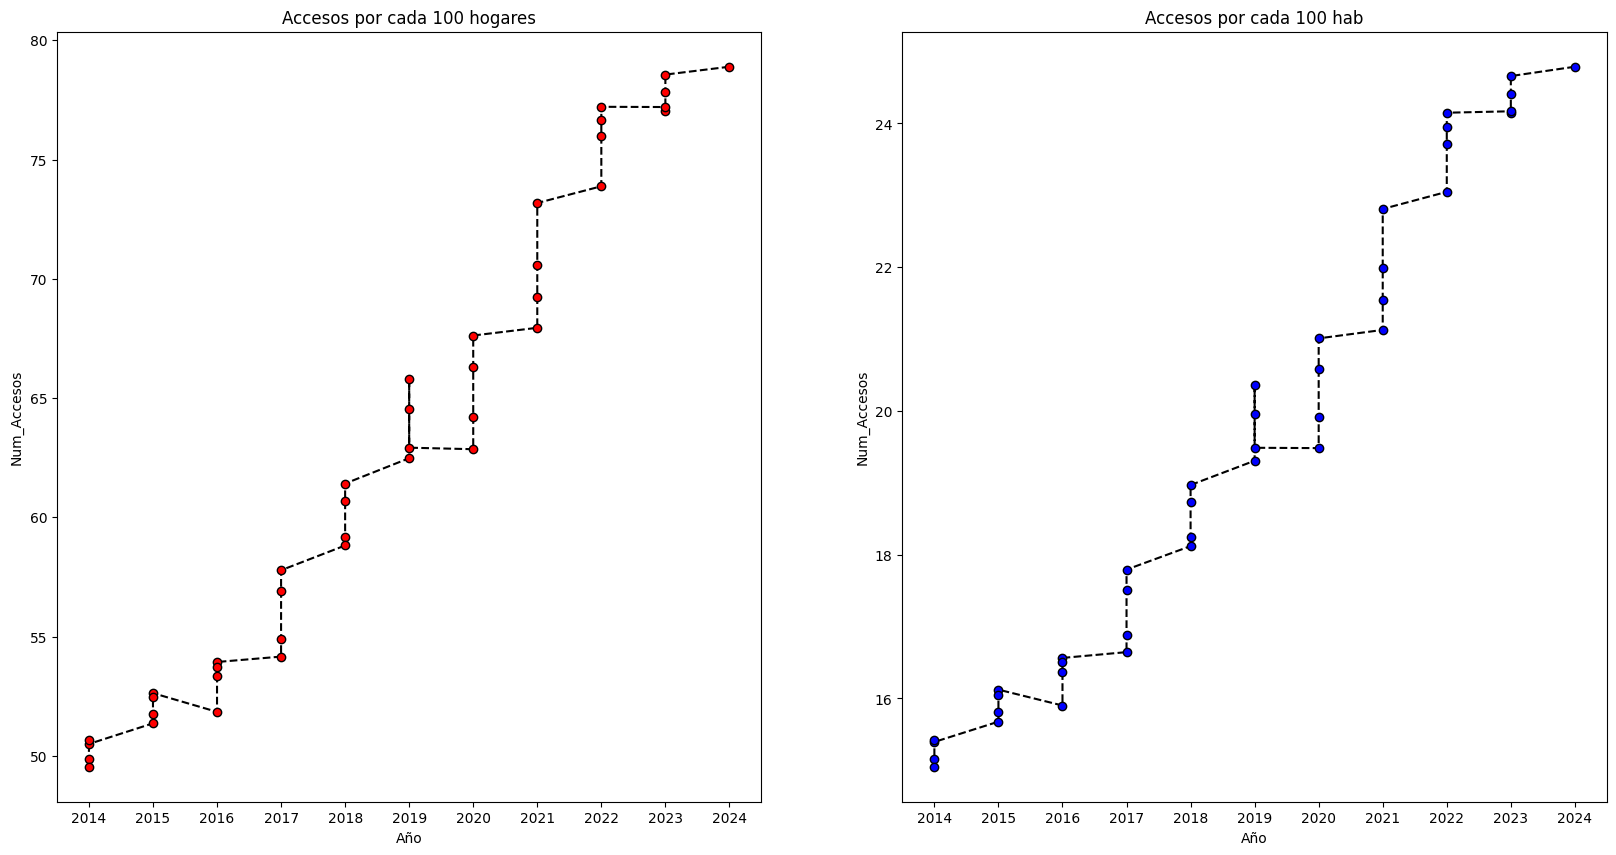

In [ ]:

plt.figure(figsize=(20,10))


plt.subplot(1,2,1)
plt.plot('Año', 'Accesos por cada 100 hogares', data=penetracion_total, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')


plt.subplot(1,2,2)
plt.plot('Año', 'Accesos por cada 100 hab', data=penetracion_total, marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hab')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.show()

## Penetracion por provinicias

In [106]:
#Obtenemos un Dataframe  de la hoja Penetración-poblacion
penetracion_provincias = dataframes['penetración_poblacion']

In [107]:
#Agregamos una nueva columna al DataFrame y leagregamos la columna de Accesos por cada 100 hogares de la hoja hogares
penetracion_provincias['Accesos por cada 100 hogares'] = dataframes['penetracion_hogares']['Accesos por cada 100 hogares']

In [108]:
lista_provincias = penetracion_provincias['Provincia'].unique().tolist()

In [109]:
lista_pen = penetracion_provincias.columns[:][-2:].tolist()

In [110]:
def taza_crecimiento_penetracion_total(data):
  """Funcion que obtiene un dataframe con las taza de crecimientode de la penetracion por hogar y por habitante por provincia"""
  
  df_general = pd.DataFrame(columns=['Provincia','Accesos por cada 100 hab','Accesos por cada 100 hogares'])
  df_general['Provincia'] = lista_provincias
  taza_pen = {}
  contador = 0
  
  for provincia in lista_provincias:
    val_prov = data[data['Provincia'] == provincia]
    val_prov = val_prov.sort_values(by=['Año','Trimestre'],ascending=True)
    
    for i in lista_pen:
      
      val = val_prov[i].pct_change() * 100
      taza_pen[i] = val.mean()

    df_taza_pen = pd.DataFrame.from_dict(taza_pen,orient='index',columns=['Taza'])
    df_general.iloc[contador,1:] = df_taza_pen.T.iloc[0, :df_general.shape[1]]

    contador +=1
    

  return df_general

In [136]:
taza_penetracion_total = taza_crecimiento_penetracion_total(penetracion_provincias)

In [137]:
taza_penetracion_total

,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,Buenos Aires,1.311987,1.028205
1,Capital Federal,0.408274,0.244196
2,Catamarca,2.829133,2.837688
3,Chaco,2.109917,2.11397
4,Chubut,2.10697,2.121731
5,Córdoba,1.379997,1.388451
6,Corrientes,2.197463,2.199804
7,Entre Ríos,1.809059,1.813518
8,Formosa,2.28572,2.292703
9,Jujuy,3.652688,3.662265


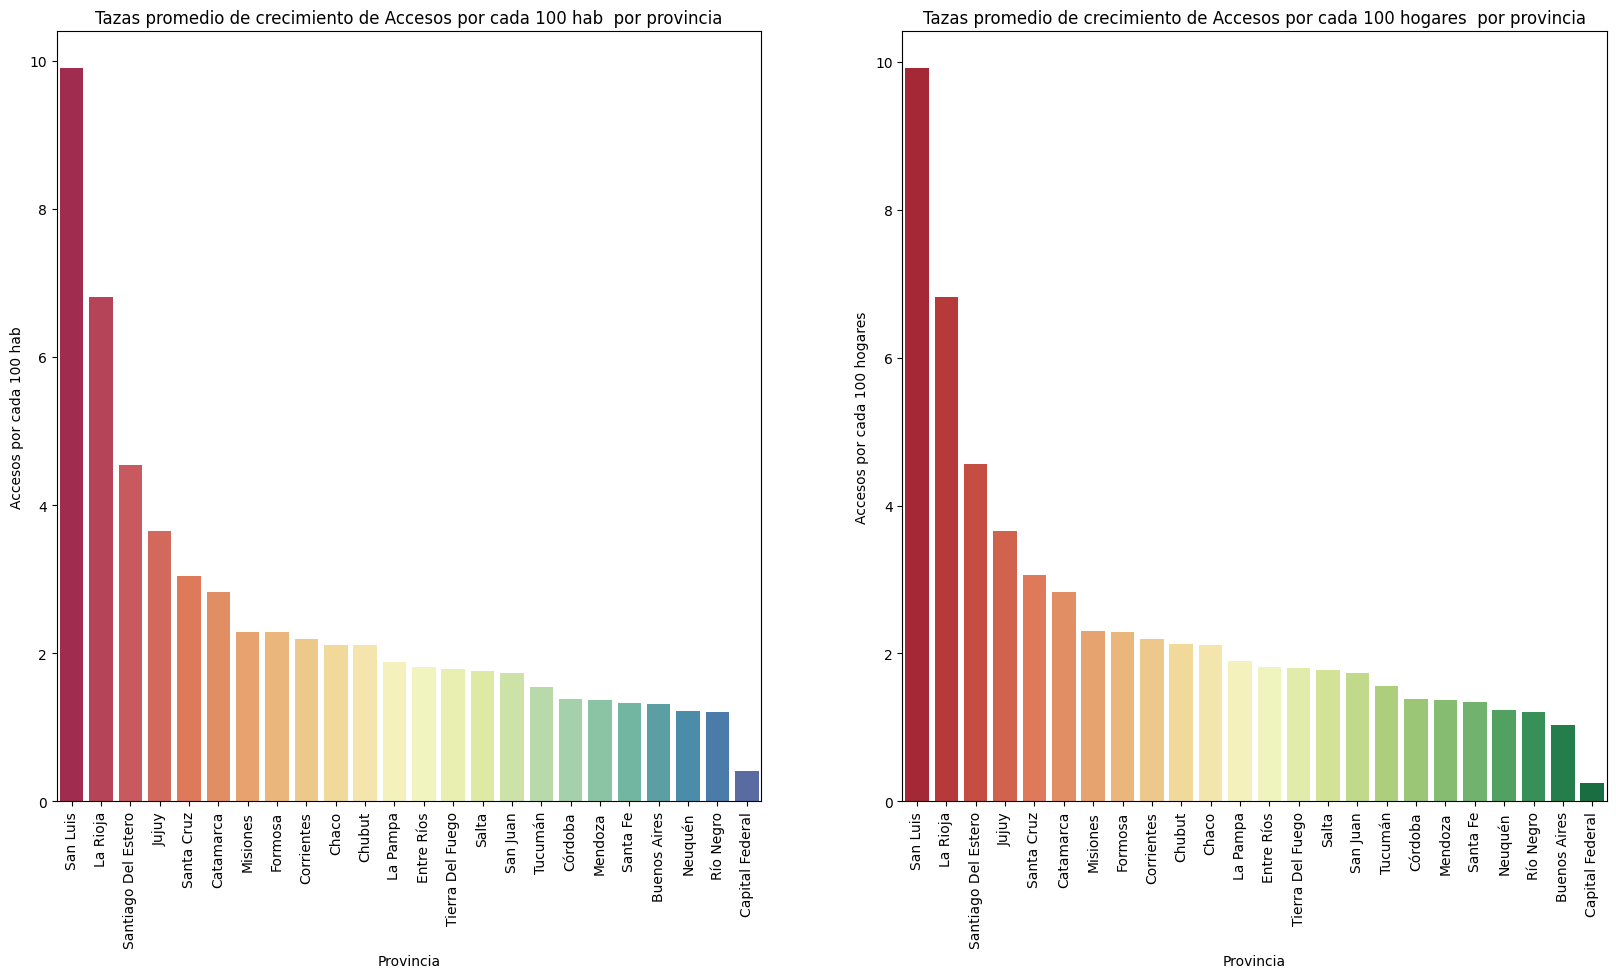

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.barplot (x='Provincia',y='Accesos por cada 100 hab',data=taza_penetracion_total.sort_values(by='Accesos por cada 100 hab',ascending=False),  palette='Spectral',hue='Provincia')
plt.title('Tazas promedio de crecimiento de Accesos por cada 100 hab  por provincia')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot (x='Provincia',y='Accesos por cada 100 hogares',data=taza_penetracion_total.sort_values(by='Accesos por cada 100 hogares',ascending=False),  palette='RdYlGn',hue='Provincia')
plt.title('Tazas promedio de crecimiento de Accesos por cada 100 hogares  por provincia')
plt.xticks(rotation=90)

plt.show()



## Gaficas de la penetracion de hogares y habitantes en las  provinicas con mayor y menor taza de crecimiento por habitantes y hogares

In [111]:
def taza_crecimiento_penetracion(data):
  """Funcion que obtiene un dataframe con las taza de crecimientode cada tecnologia"""
  data = data.sort_values(by=['Año','Trimestre'],ascending=True)
  taza_pen = {}
  for i in lista_pen:
    val = data[i].pct_change() * 100
    taza_pen[i] = val.mean()
  df_taza_tec = pd.DataFrame.from_dict(taza_pen,orient='index',columns=['Taza'])
  return df_taza_tec

In [127]:
def taza_crecimiento_penetracion_2(data):
    """Funcion que obtiene un dataframe con las taza de crecimientode cada tecnologia"""
    data = data.sort_values(by=['Año','Trimestre'],ascending=True)
    
  
    data['taza'] = data['Accesos por cada 100 hogares'].pct_change() * 100
    taza_año = data.groupby('Año')['taza'].mean().reset_index()
    taza_trimestre = data.groupby('Trimestre')['taza'].mean().reset_index()
   
   

    return taza_año , taza_trimestre

In [144]:
año,taza = taza_crecimiento_penetracion_2(penetracion_provincias[penetracion_provincias['Provincia'] == 'Tierra Del Fuego'])

In [145]:
taza = float(taza['taza'].mean())

In [146]:
taza

1.803395074189368

In [147]:
año['taza'].mean()

np.float64(1.621124045444582)

## - Buenos Aires

In [112]:
penetracion_provincias[penetracion_provincias['Provincia'] == 'Buenos Aires']

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,27.800000,81.100000
24,2023,4,Buenos Aires,27.680000,80.960000
48,2023,3,Buenos Aires,27.500000,80.640000
72,2023,2,Buenos Aires,27.100000,79.670000
96,2023,1,Buenos Aires,26.810000,79.000000
120,2022,4,Buenos Aires,26.720000,78.940000
144,2022,3,Buenos Aires,26.370000,78.110000
168,2022,2,Buenos Aires,26.129271,77.580000
192,2022,1,Buenos Aires,25.563030,76.078147
216,2021,4,Buenos Aires,25.362514,75.664106


In [133]:
taza_Pen_BA = taza_crecimiento_penetracion(penetracion_provincias[penetracion_provincias['Provincia'] == 'Buenos Aires'])

In [134]:
taza_Pen_BA

,Taza
Accesos por cada 100 hab,1.311987
Accesos por cada 100 hogares,1.028205


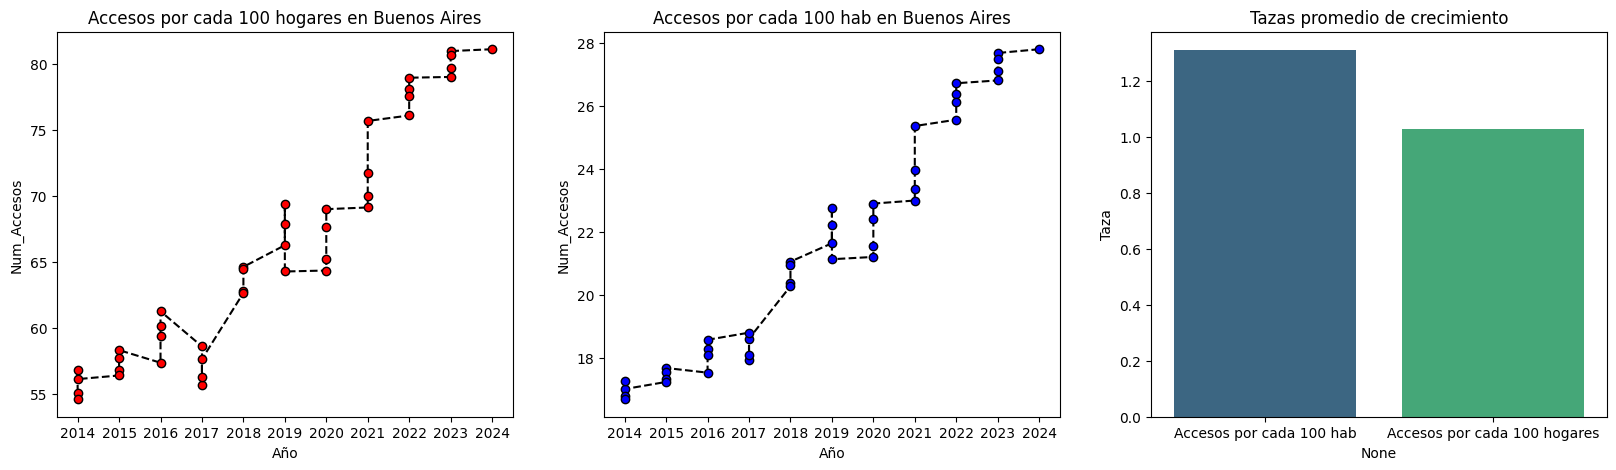

In [ ]:

plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
plt.plot('Año', 'Accesos por cada 100 hogares', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'Buenos Aires'], marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hogares en Buenos Aires')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')


plt.subplot(1,3,2)
plt.plot('Año', 'Accesos por cada 100 hab', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'Buenos Aires'], marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hab en Buenos Aires')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(1,3,3)
sns.barplot(x=taza_Pen_BA.index , y='Taza', data=taza_Pen_BA, palette='viridis',hue=taza_Pen_BA.index)
plt.title('Tazas promedio de crecimiento')

plt.show()

## - Capital Federal

In [ ]:
taza_Pen_CF = taza_crecimiento_penetracion(penetracion_provincias[penetracion_provincias['Provincia'] == 'Capital Federal'])

In [ ]:
taza_Pen_CF

,Taza
Accesos por cada 100 hab,0.426639
Accesos por cada 100 hogares,0.214916


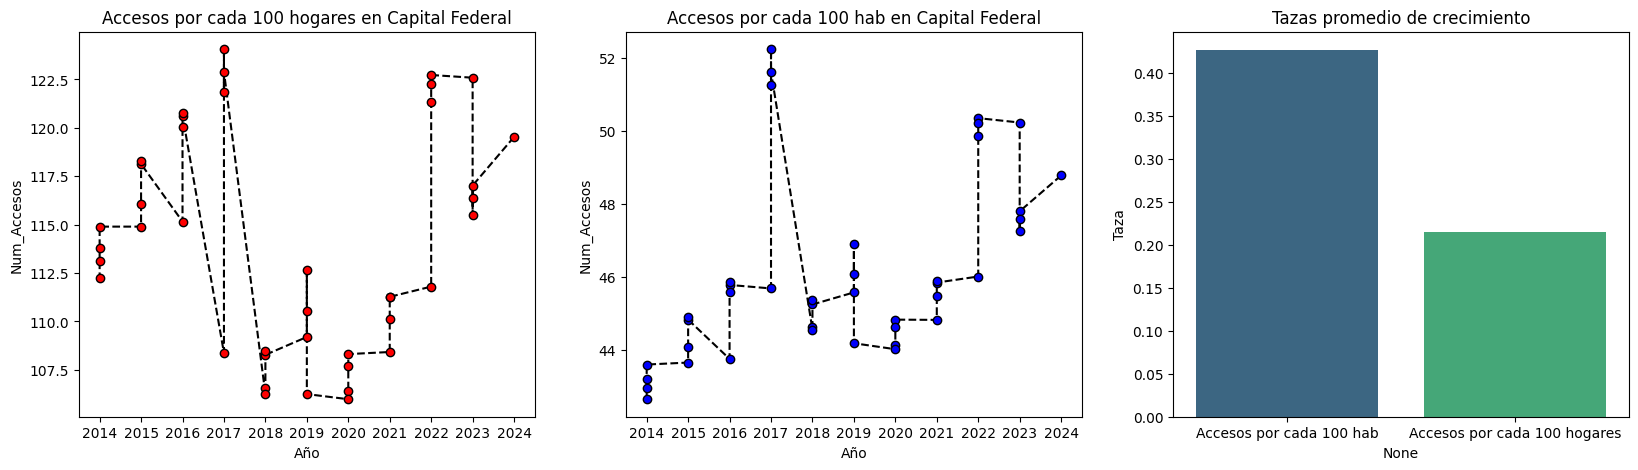

In [ ]:

plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
plt.plot('Año', 'Accesos por cada 100 hogares', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'Capital Federal'], marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hogares en Capital Federal')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')


plt.subplot(1,3,2)
plt.plot('Año', 'Accesos por cada 100 hab', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'Capital Federal'], marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hab en Capital Federal')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(1,3,3)
sns.barplot(x=taza_Pen_CF.index , y='Taza', data=taza_Pen_CF, palette='viridis',hue=taza_Pen_CF.index)
plt.title('Tazas promedio de crecimiento')

plt.show()

## - San Luis

In [ ]:
taza_Pen_SL = taza_crecimiento_penetracion(penetracion_provincias[penetracion_provincias['Provincia'] == 'San Luis'])

In [ ]:
taza_Pen_SL

,Taza
Accesos por cada 100 hab,10.083592
Accesos por cada 100 hogares,10.093832


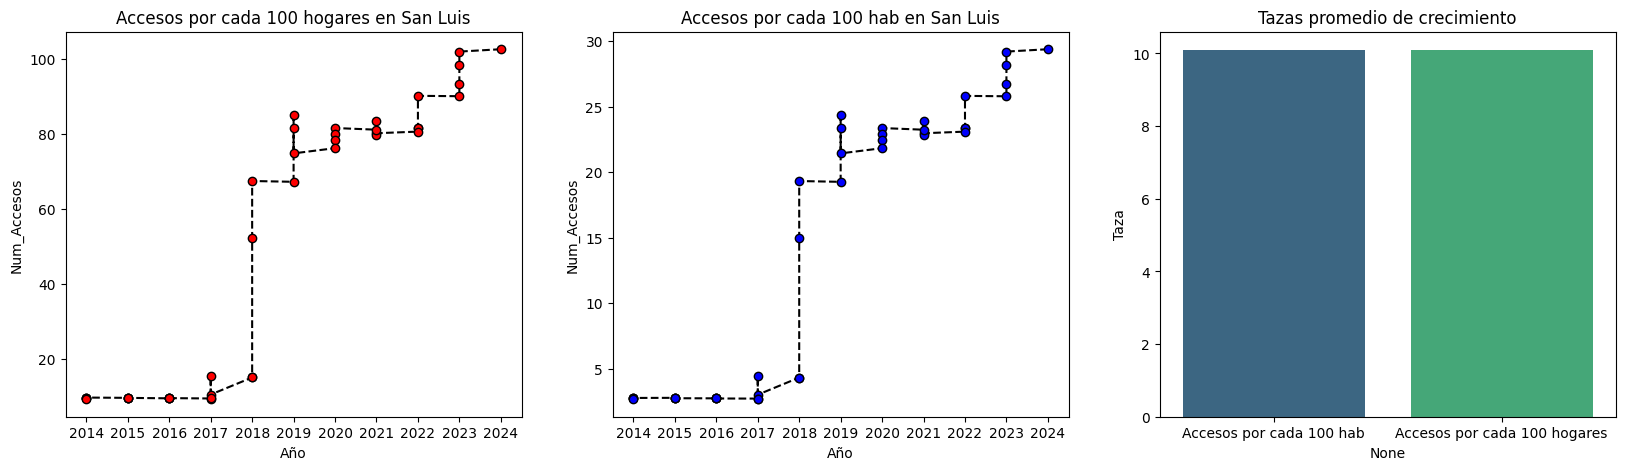

In [ ]:

plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
plt.plot('Año', 'Accesos por cada 100 hogares', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'San Luis'], marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hogares en San Luis')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')


plt.subplot(1,3,2)
plt.plot('Año', 'Accesos por cada 100 hab', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'San Luis'], marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hab en San Luis')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(1,3,3)
sns.barplot(x=taza_Pen_SL.index , y='Taza', data=taza_Pen_SL, palette='viridis',hue=taza_Pen_SL.index)
plt.title('Tazas promedio de crecimiento')

plt.show()

## - La Rioja

In [ ]:
taza_Pen_Rioja = taza_crecimiento_penetracion(penetracion_provincias[penetracion_provincias['Provincia'] == 'La Rioja'])

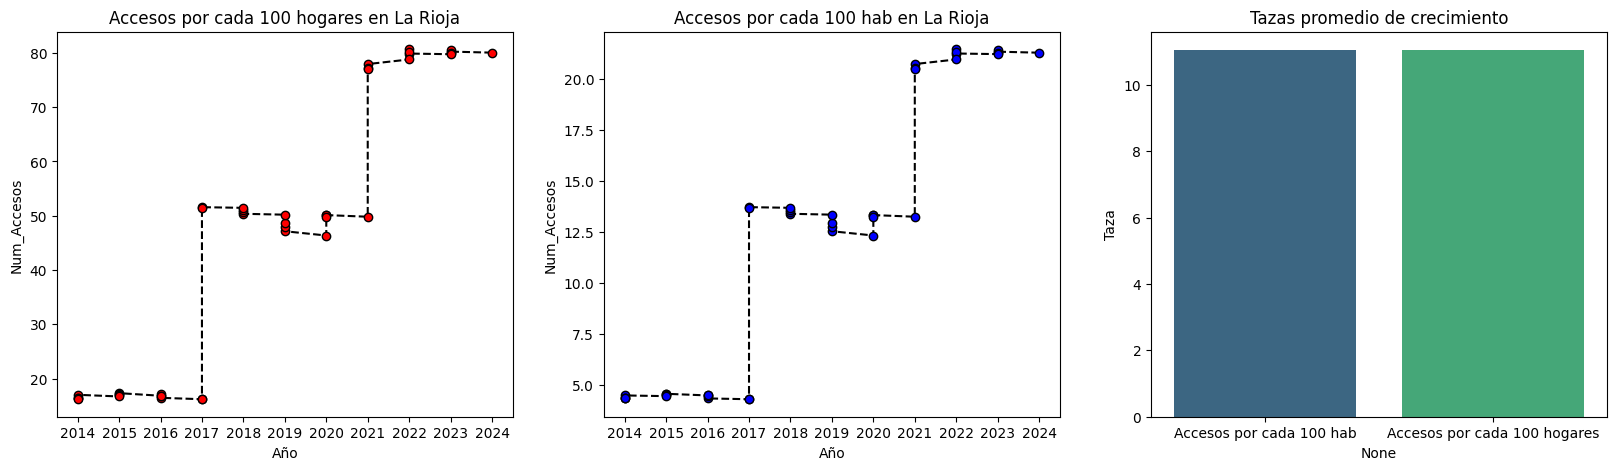

In [ ]:

plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
plt.plot('Año', 'Accesos por cada 100 hogares', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'La Rioja'], marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hogares en La Rioja')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')


plt.subplot(1,3,2)
plt.plot('Año', 'Accesos por cada 100 hab', data=penetracion_provincias[penetracion_provincias['Provincia'] == 'La Rioja'], marker='o',ls="--",c='black',mfc="blue")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Accesos por cada 100 hab en La Rioja')
plt.xlabel('Año')
plt.ylabel('Num_Accesos')

plt.subplot(1,3,3)
sns.barplot(x=taza_Pen_Rioja.index , y='Taza', data=taza_Pen_Rioja, palette='viridis',hue=taza_Pen_Rioja.index)
plt.title('Tazas promedio de crecimiento')

plt.show()

## Conclusion
### De las graficas anteriores se puede concluir que las provincias mas grandes tienen una taza de crecimiento mas baja en comparacion al resto esto es debido a que la mayoria de su poblacion ya tiene acceso a internet mientras las demas ciudades que tiene por cubrir todavia una gran parte de sus habitantes tienen una mayor taza como lo son las provincias de San Luis y La Rioja que son los que presentan mayor taza de crecimiento

# Ingresos

In [ ]:
data_ingresos = dataframes['ingresos'] 

In [ ]:
data_ingresos.shape

(41, 4)

In [ ]:
data_ingresos.replace(2033,2023,inplace=True)

In [ ]:
data_ingresos.sort_values(by='Año',ascending=True,inplace=True)

In [ ]:
taza_ingresos = data_ingresos['Ingresos (miles de pesos)'].pct_change() * 100


In [ ]:
data_ingresos['Taza'] = taza_ingresos

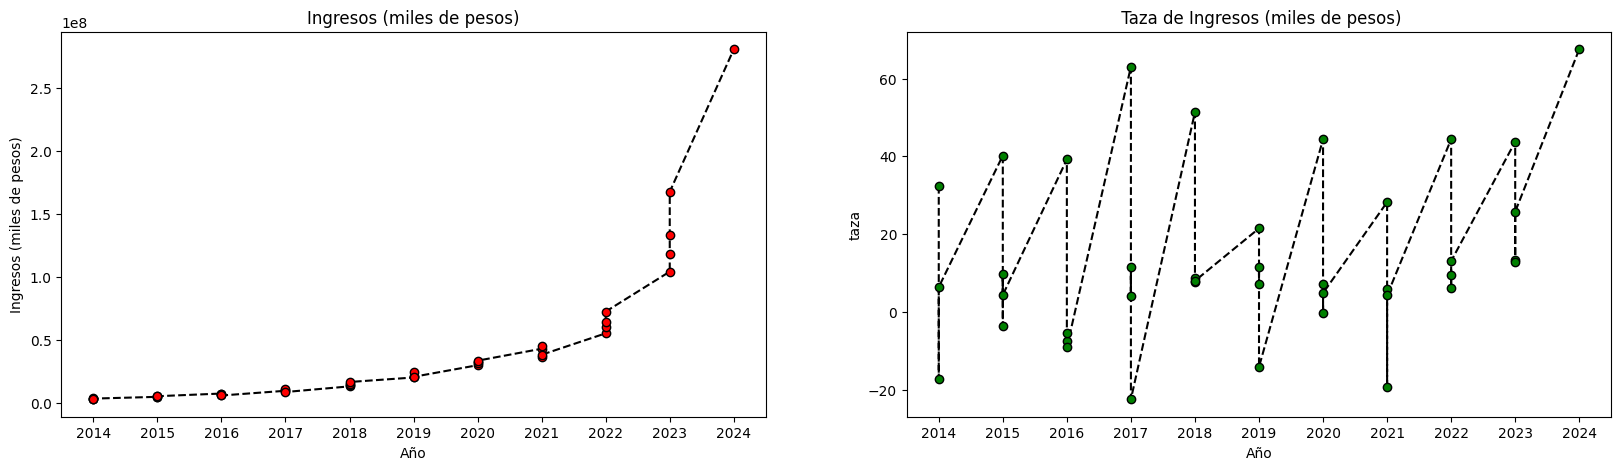

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot('Año', 'Ingresos (miles de pesos)', data=data_ingresos, marker='o',ls="--",c='black',mfc="red")
plt.xticks(np.arange(2014, 2025, 1))
plt.title('Ingresos (miles de pesos)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')

plt.subplot(1,2,2)
plt.plot('Año', 'Taza', data=data_ingresos, marker='o',ls="--",c='black',mfc="green")
plt.xticks(np.arange(2014, 2025, 1))
plt.title(' Taza de Ingresos (miles de pesos)')
plt.xlabel('Año')
plt.ylabel('taza')

plt.show()

In [ ]:
data_ingresos[['Año','Taza',]].sort_values(by='Taza',ascending=False)

,Año,Taza
0,2024,67.538416
27,2017,63.026778
24,2018,51.375179
8,2022,44.403228
16,2020,44.366999
4,2023,43.746530
36,2015,40.180889
29,2016,39.187664
37,2014,32.385021
10,2021,28.206098
